# Problem Set 1
Plot the Moment-Capacity Curve and comment on As = atleast twice Asb

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import math

def centroid_of_tbeam(bf, tf, bw, y):
    # Calculate centroid of t-beam from top of flange
    # y - height of beam
    kd_prime = 0
    if (y <= tf):
        kd_prime = y / 2
    else:
        a_total = bf * tf + bw * (y - tf)
        ay = bf * tf * tf / 2
        ay += bw * (y - tf) * ((y - tf) / 2 + tf)
        kd_prime = ay / a_total
    return kd_prime

def area_of_tbeam(bf, tf, bw, y):
    # Calculate the area of t-beam
    area = 0
    if (y <= tf):
        area = bf * y
    else:
        area = bf * tf + bw * (y - tf)
    return area

In [2]:
student_number = [3, 3, 8]
d = 435
bw = 250
tf = 125
ϵcu = 0.003
Es = 200000
fc_base = 28        # Basis for calculating β1
student_number_reversed = ['.']

# Reverse the student number then append decimal at the start
for i in range(len(student_number)):
    student_number_reversed.append(str(student_number[len(student_number) - 1 - i]))

# Converted student number
student_number_reversed = float(''.join(student_number_reversed))

# Factor for calculating flange width
α = 10 + 10 * student_number_reversed

# Calculate for b then round to the nearest 25mm
bf = bw + α * tf
bf = int(round(bf / 100 * 4) / 4 * 100)
print('bf = ', bf)
# Given arrays
fcPrime = [20, 40, 20, 40]
fy = [300, 300, 400, 400]
β1 = []

# Calculate for corresponding β1
for fcx in fcPrime:
    if fcx <= fc_base:
        β1.append(0.85)
    else:
        β1.append(round(0.85 - (0.05 / 7)*(fcx - fc_base), 3))
        
# Results array
M = ([0], [0], [0], [0])
As = ([0], [0], [0], [0])
        
# -------------------------------------
# Start of problem main calculation
# -------------------------------------
for i in range(4):     # 4 cases
    print('= = = = = = = = = = = = =')
    print('Case # ', i+1)
    print('= = = = = = = = = = = = =')
    
    # Calculate balanced value for 'c'
    c_bal = 600 * d / (600 + fy[i])
    
    # Balanced equivalent compression block height
    a_bal = β1[i] * c_bal
    
    # Web component of the compression, z
    z_bal = a_bal - tf if a_bal > tf else 0
    
    # Balanced equation
    # Asb.fy = 0.85 f'c.bf.tf + 0.85f'c.bw.z
    As_bal = (0.85 * fcPrime[i] * bf * tf + 0.85 * fcPrime[i] * bw * z_bal) / fy[i]
    
    print('cb = ', c_bal, 'ab = ', a_bal, 'zb = ', z_bal, 'Asb = ', round(As_bal, 3))
    
    As_limit = 2 * As_bal
    
    As_trial = 100
    
    while (As_trial <= As_limit):
        a = 10
        As_calc = 0
        fs = 0.0
        while (As_calc < As_trial):
            c = a / β1[i]
            fs = 600 * (d - c) / c
            if (fs >= fy[i]):
                fs = fy[i]
            Ac = area_of_tbeam(bf, tf, bw, a)
            
            As_calc = 0.85 * fcPrime[i] * Ac / fs
            # Try for a
            a += 0.05
        
        # Calculate moment
        Mn = As_calc * fs * (d - centroid_of_tbeam(bf, tf, bw, a))
        
        M[i].append(Mn/1000**2)
        As[i].append(As_calc)
        
        print('As = ', round(As_trial, 2),'M = ', round(Mn / 1000**2, 2), 'c = ', \
              round(c, 2), 'a = ', round(a, 2), 'fs = ', round(fs, 2))
        # Increment steel area each loop
        As_trial += 10

bf =  2550
= = = = = = = = = = = = =
Case #  1
= = = = = = = = = = = = =
cb =  290.0 ab =  246.5 zb =  121.5 Asb =  19783.75
As =  100 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  110 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  120 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  130 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  140 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  150 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  160 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  170 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  180 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  190 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  200 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  210 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  220 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  230 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  240 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  250 M =  186.39 c =  11.76 a =  10.05 fs =  300
As =  260 M

As =  2060 M =  265.21 c =  16.82 a =  14.35 fs =  300
As =  2070 M =  266.12 c =  16.88 a =  14.4 fs =  300
As =  2080 M =  267.03 c =  16.94 a =  14.45 fs =  300
As =  2090 M =  268.86 c =  17.06 a =  14.55 fs =  300
As =  2100 M =  269.77 c =  17.12 a =  14.6 fs =  300
As =  2110 M =  271.59 c =  17.24 a =  14.7 fs =  300
As =  2120 M =  272.5 c =  17.29 a =  14.75 fs =  300
As =  2130 M =  273.41 c =  17.35 a =  14.8 fs =  300
As =  2140 M =  275.23 c =  17.47 a =  14.9 fs =  300
As =  2150 M =  276.14 c =  17.53 a =  14.95 fs =  300
As =  2160 M =  277.06 c =  17.59 a =  15.0 fs =  300
As =  2170 M =  278.88 c =  17.71 a =  15.1 fs =  300
As =  2180 M =  279.79 c =  17.76 a =  15.15 fs =  300
As =  2190 M =  281.61 c =  17.88 a =  15.25 fs =  300
As =  2200 M =  282.52 c =  17.94 a =  15.3 fs =  300
As =  2210 M =  283.43 c =  18.0 a =  15.35 fs =  300
As =  2220 M =  285.24 c =  18.12 a =  15.45 fs =  300
As =  2230 M =  286.15 c =  18.18 a =  15.5 fs =  300
As =  2240 M =  287.9

As =  4560 M =  574.21 c =  37.18 a =  31.65 fs =  300
As =  4570 M =  575.09 c =  37.24 a =  31.7 fs =  300
As =  4580 M =  575.96 c =  37.29 a =  31.75 fs =  300
As =  4590 M =  577.71 c =  37.41 a =  31.85 fs =  300
As =  4600 M =  578.58 c =  37.47 a =  31.9 fs =  300
As =  4610 M =  580.33 c =  37.59 a =  32.0 fs =  300
As =  4620 M =  581.2 c =  37.65 a =  32.05 fs =  300
As =  4630 M =  582.08 c =  37.71 a =  32.1 fs =  300
As =  4640 M =  583.82 c =  37.82 a =  32.2 fs =  300
As =  4650 M =  584.7 c =  37.88 a =  32.25 fs =  300
As =  4660 M =  585.57 c =  37.94 a =  32.3 fs =  300
As =  4670 M =  587.31 c =  38.06 a =  32.4 fs =  300
As =  4680 M =  588.19 c =  38.12 a =  32.45 fs =  300
As =  4690 M =  589.93 c =  38.24 a =  32.55 fs =  300
As =  4700 M =  590.8 c =  38.29 a =  32.6 fs =  300
As =  4710 M =  591.68 c =  38.35 a =  32.65 fs =  300
As =  4720 M =  593.42 c =  38.47 a =  32.75 fs =  300
As =  4730 M =  594.29 c =  38.53 a =  32.8 fs =  300
As =  4740 M =  596.04

As =  6950 M =  856.83 c =  56.59 a =  48.15 fs =  300
As =  6960 M =  858.51 c =  56.71 a =  48.25 fs =  300
As =  6970 M =  859.35 c =  56.76 a =  48.3 fs =  300
As =  6980 M =  861.03 c =  56.88 a =  48.4 fs =  300
As =  6990 M =  861.86 c =  56.94 a =  48.45 fs =  300
As =  7000 M =  862.7 c =  57.0 a =  48.5 fs =  300
As =  7010 M =  864.38 c =  57.12 a =  48.6 fs =  300
As =  7020 M =  865.21 c =  57.18 a =  48.65 fs =  300
As =  7030 M =  866.89 c =  57.29 a =  48.75 fs =  300
As =  7040 M =  867.73 c =  57.35 a =  48.8 fs =  300
As =  7050 M =  868.56 c =  57.41 a =  48.85 fs =  300
As =  7060 M =  870.24 c =  57.53 a =  48.95 fs =  300
As =  7070 M =  871.07 c =  57.59 a =  49.0 fs =  300
As =  7080 M =  871.91 c =  57.65 a =  49.05 fs =  300
As =  7090 M =  873.58 c =  57.76 a =  49.15 fs =  300
As =  7100 M =  874.42 c =  57.82 a =  49.2 fs =  300
As =  7110 M =  876.09 c =  57.94 a =  49.3 fs =  300
As =  7120 M =  876.93 c =  58.0 a =  49.35 fs =  300
As =  7130 M =  877.7

As =  9060 M =  1097.07 c =  73.76 a =  62.75 fs =  300
As =  9070 M =  1098.68 c =  73.88 a =  62.85 fs =  300
As =  9080 M =  1099.49 c =  73.94 a =  62.9 fs =  300
As =  9090 M =  1101.1 c =  74.06 a =  63.0 fs =  300
As =  9100 M =  1101.91 c =  74.12 a =  63.05 fs =  300
As =  9110 M =  1102.72 c =  74.18 a =  63.1 fs =  300
As =  9120 M =  1104.33 c =  74.29 a =  63.2 fs =  300
As =  9130 M =  1105.13 c =  74.35 a =  63.25 fs =  300
As =  9140 M =  1106.75 c =  74.47 a =  63.35 fs =  300
As =  9150 M =  1107.55 c =  74.53 a =  63.4 fs =  300
As =  9160 M =  1108.36 c =  74.59 a =  63.45 fs =  300
As =  9170 M =  1109.97 c =  74.71 a =  63.55 fs =  300
As =  9180 M =  1110.77 c =  74.76 a =  63.6 fs =  300
As =  9190 M =  1111.58 c =  74.82 a =  63.65 fs =  300
As =  9200 M =  1113.19 c =  74.94 a =  63.75 fs =  300
As =  9210 M =  1113.99 c =  75.0 a =  63.8 fs =  300
As =  9220 M =  1115.6 c =  75.12 a =  63.9 fs =  300
As =  9230 M =  1116.41 c =  75.18 a =  63.95 fs =  300
As 

As =  11060 M =  1316.43 c =  90.06 a =  76.6 fs =  300
As =  11070 M =  1317.98 c =  90.18 a =  76.7 fs =  300
As =  11080 M =  1318.76 c =  90.24 a =  76.75 fs =  300
As =  11090 M =  1319.53 c =  90.29 a =  76.8 fs =  300
As =  11100 M =  1321.09 c =  90.41 a =  76.9 fs =  300
As =  11110 M =  1321.86 c =  90.47 a =  76.95 fs =  300
As =  11120 M =  1323.41 c =  90.59 a =  77.05 fs =  300
As =  11130 M =  1324.19 c =  90.65 a =  77.1 fs =  300
As =  11140 M =  1324.97 c =  90.71 a =  77.15 fs =  300
As =  11150 M =  1326.52 c =  90.82 a =  77.25 fs =  300
As =  11160 M =  1327.29 c =  90.88 a =  77.3 fs =  300
As =  11170 M =  1328.84 c =  91.0 a =  77.4 fs =  300
As =  11180 M =  1329.62 c =  91.06 a =  77.45 fs =  300
As =  11190 M =  1330.39 c =  91.12 a =  77.5 fs =  300
As =  11200 M =  1331.94 c =  91.24 a =  77.6 fs =  300
As =  11210 M =  1332.72 c =  91.29 a =  77.65 fs =  300
As =  11220 M =  1333.49 c =  91.35 a =  77.7 fs =  300
As =  11230 M =  1335.04 c =  91.47 a =  7

As =  13060 M =  1527.47 c =  106.35 a =  90.45 fs =  300
As =  13070 M =  1528.21 c =  106.41 a =  90.5 fs =  300
As =  13080 M =  1529.71 c =  106.53 a =  90.6 fs =  300
As =  13090 M =  1530.45 c =  106.59 a =  90.65 fs =  300
As =  13100 M =  1531.95 c =  106.71 a =  90.75 fs =  300
As =  13110 M =  1532.69 c =  106.76 a =  90.8 fs =  300
As =  13120 M =  1533.44 c =  106.82 a =  90.85 fs =  300
As =  13130 M =  1534.93 c =  106.94 a =  90.95 fs =  300
As =  13140 M =  1535.67 c =  107.0 a =  91.0 fs =  300
As =  13150 M =  1537.17 c =  107.12 a =  91.1 fs =  300
As =  13160 M =  1537.91 c =  107.18 a =  91.15 fs =  300
As =  13170 M =  1538.66 c =  107.24 a =  91.2 fs =  300
As =  13180 M =  1540.15 c =  107.35 a =  91.3 fs =  300
As =  13190 M =  1540.89 c =  107.41 a =  91.35 fs =  300
As =  13200 M =  1541.64 c =  107.47 a =  91.4 fs =  300
As =  13210 M =  1543.13 c =  107.59 a =  91.5 fs =  300
As =  13220 M =  1543.87 c =  107.65 a =  91.55 fs =  300
As =  13230 M =  1545.36

As =  15060 M =  1730.19 c =  122.65 a =  104.3 fs =  300
As =  15070 M =  1730.91 c =  122.71 a =  104.35 fs =  300
As =  15080 M =  1732.34 c =  122.82 a =  104.45 fs =  300
As =  15090 M =  1733.06 c =  122.88 a =  104.5 fs =  300
As =  15100 M =  1733.77 c =  122.94 a =  104.55 fs =  300
As =  15110 M =  1735.21 c =  123.06 a =  104.65 fs =  300
As =  15120 M =  1735.92 c =  123.12 a =  104.7 fs =  300
As =  15130 M =  1737.35 c =  123.24 a =  104.8 fs =  300
As =  15140 M =  1738.07 c =  123.29 a =  104.85 fs =  300
As =  15150 M =  1738.78 c =  123.35 a =  104.9 fs =  300
As =  15160 M =  1740.22 c =  123.47 a =  105.0 fs =  300
As =  15170 M =  1740.93 c =  123.53 a =  105.05 fs =  300
As =  15180 M =  1742.36 c =  123.65 a =  105.15 fs =  300
As =  15190 M =  1743.08 c =  123.71 a =  105.2 fs =  300
As =  15200 M =  1743.79 c =  123.76 a =  105.25 fs =  300
As =  15210 M =  1745.22 c =  123.88 a =  105.35 fs =  300
As =  15220 M =  1745.93 c =  123.94 a =  105.4 fs =  300
As = 

As =  17050 M =  1923.22 c =  138.82 a =  118.05 fs =  300
As =  17060 M =  1924.6 c =  138.94 a =  118.15 fs =  300
As =  17070 M =  1925.29 c =  139.0 a =  118.2 fs =  300
As =  17080 M =  1926.66 c =  139.12 a =  118.3 fs =  300
As =  17090 M =  1927.35 c =  139.18 a =  118.35 fs =  300
As =  17100 M =  1928.03 c =  139.24 a =  118.4 fs =  300
As =  17110 M =  1929.4 c =  139.35 a =  118.5 fs =  300
As =  17120 M =  1930.09 c =  139.41 a =  118.55 fs =  300
As =  17130 M =  1930.78 c =  139.47 a =  118.6 fs =  300
As =  17140 M =  1932.15 c =  139.59 a =  118.7 fs =  300
As =  17150 M =  1932.83 c =  139.65 a =  118.75 fs =  300
As =  17160 M =  1934.2 c =  139.76 a =  118.85 fs =  300
As =  17170 M =  1934.89 c =  139.82 a =  118.9 fs =  300
As =  17180 M =  1935.57 c =  139.88 a =  118.95 fs =  300
As =  17190 M =  1936.94 c =  140.0 a =  119.05 fs =  300
As =  17200 M =  1937.63 c =  140.06 a =  119.1 fs =  300
As =  17210 M =  1939.0 c =  140.18 a =  119.2 fs =  300
As =  17220 

As =  18550 M =  2061.33 c =  187.59 a =  159.5 fs =  300
As =  18560 M =  2062.15 c =  188.41 a =  160.2 fs =  300
As =  18570 M =  2062.97 c =  189.24 a =  160.9 fs =  300
As =  18580 M =  2063.78 c =  190.06 a =  161.6 fs =  300
As =  18590 M =  2064.59 c =  190.88 a =  162.3 fs =  300
As =  18600 M =  2065.4 c =  191.71 a =  163.0 fs =  300
As =  18610 M =  2066.21 c =  192.53 a =  163.7 fs =  300
As =  18620 M =  2067.07 c =  193.41 a =  164.45 fs =  300
As =  18630 M =  2067.88 c =  194.24 a =  165.15 fs =  300
As =  18640 M =  2068.68 c =  195.06 a =  165.85 fs =  300
As =  18650 M =  2069.48 c =  195.88 a =  166.55 fs =  300
As =  18660 M =  2070.28 c =  196.71 a =  167.25 fs =  300
As =  18670 M =  2071.07 c =  197.53 a =  167.95 fs =  300
As =  18680 M =  2071.87 c =  198.35 a =  168.65 fs =  300
As =  18690 M =  2072.66 c =  199.18 a =  169.35 fs =  300
As =  18700 M =  2073.45 c =  200.0 a =  170.05 fs =  300
As =  18710 M =  2074.29 c =  200.88 a =  170.8 fs =  300
As =  1

As =  20050 M =  2147.99 c =  291.24 a =  247.6 fs =  296.18
As =  20060 M =  2148.03 c =  291.29 a =  247.65 fs =  296.0
As =  20070 M =  2148.07 c =  291.35 a =  247.7 fs =  295.82
As =  20080 M =  2148.11 c =  291.41 a =  247.75 fs =  295.64
As =  20090 M =  2148.11 c =  291.41 a =  247.75 fs =  295.64
As =  20100 M =  2148.15 c =  291.47 a =  247.8 fs =  295.46
As =  20110 M =  2148.19 c =  291.53 a =  247.85 fs =  295.28
As =  20120 M =  2148.23 c =  291.59 a =  247.9 fs =  295.1
As =  20130 M =  2148.23 c =  291.59 a =  247.9 fs =  295.1
As =  20140 M =  2148.27 c =  291.65 a =  247.95 fs =  294.92
As =  20150 M =  2148.31 c =  291.71 a =  248.0 fs =  294.74
As =  20160 M =  2148.35 c =  291.76 a =  248.05 fs =  294.56
As =  20170 M =  2148.35 c =  291.76 a =  248.05 fs =  294.56
As =  20180 M =  2148.39 c =  291.82 a =  248.1 fs =  294.38
As =  20190 M =  2148.43 c =  291.88 a =  248.15 fs =  294.2
As =  20200 M =  2148.47 c =  291.94 a =  248.2 fs =  294.02
As =  20210 M =  214

As =  21550 M =  2152.35 c =  297.76 a =  253.15 fs =  276.53
As =  21560 M =  2152.35 c =  297.76 a =  253.15 fs =  276.53
As =  21570 M =  2152.39 c =  297.82 a =  253.2 fs =  276.36
As =  21580 M =  2152.42 c =  297.88 a =  253.25 fs =  276.18
As =  21590 M =  2152.42 c =  297.88 a =  253.25 fs =  276.18
As =  21600 M =  2152.46 c =  297.94 a =  253.3 fs =  276.01
As =  21610 M =  2152.5 c =  298.0 a =  253.35 fs =  275.84
As =  21620 M =  2152.5 c =  298.0 a =  253.35 fs =  275.84
As =  21630 M =  2152.54 c =  298.06 a =  253.4 fs =  275.67
As =  21640 M =  2152.58 c =  298.12 a =  253.45 fs =  275.49
As =  21650 M =  2152.58 c =  298.12 a =  253.45 fs =  275.49
As =  21660 M =  2152.62 c =  298.18 a =  253.5 fs =  275.32
As =  21670 M =  2152.66 c =  298.24 a =  253.55 fs =  275.15
As =  21680 M =  2152.7 c =  298.29 a =  253.6 fs =  274.98
As =  21690 M =  2152.7 c =  298.29 a =  253.6 fs =  274.98
As =  21700 M =  2152.73 c =  298.35 a =  253.65 fs =  274.8
As =  21710 M =  2152

As =  23050 M =  2156.16 c =  303.65 a =  258.15 fs =  259.55
As =  23060 M =  2156.2 c =  303.71 a =  258.2 fs =  259.38
As =  23070 M =  2156.2 c =  303.71 a =  258.2 fs =  259.38
As =  23080 M =  2156.23 c =  303.76 a =  258.25 fs =  259.22
As =  23090 M =  2156.27 c =  303.82 a =  258.3 fs =  259.05
As =  23100 M =  2156.27 c =  303.82 a =  258.3 fs =  259.05
As =  23110 M =  2156.31 c =  303.88 a =  258.35 fs =  258.89
As =  23120 M =  2156.35 c =  303.94 a =  258.4 fs =  258.72
As =  23130 M =  2156.35 c =  303.94 a =  258.4 fs =  258.72
As =  23140 M =  2156.38 c =  304.0 a =  258.45 fs =  258.55
As =  23150 M =  2156.38 c =  304.0 a =  258.45 fs =  258.55
As =  23160 M =  2156.42 c =  304.06 a =  258.5 fs =  258.39
As =  23170 M =  2156.46 c =  304.12 a =  258.55 fs =  258.22
As =  23180 M =  2156.46 c =  304.12 a =  258.55 fs =  258.22
As =  23190 M =  2156.5 c =  304.18 a =  258.6 fs =  258.05
As =  23200 M =  2156.53 c =  304.24 a =  258.65 fs =  257.89
As =  23210 M =  2156

As =  24550 M =  2159.57 c =  309.06 a =  262.75 fs =  244.5
As =  24560 M =  2159.61 c =  309.12 a =  262.8 fs =  244.34
As =  24570 M =  2159.61 c =  309.12 a =  262.8 fs =  244.34
As =  24580 M =  2159.64 c =  309.18 a =  262.85 fs =  244.18
As =  24590 M =  2159.64 c =  309.18 a =  262.85 fs =  244.18
As =  24600 M =  2159.68 c =  309.24 a =  262.9 fs =  244.02
As =  24610 M =  2159.72 c =  309.29 a =  262.95 fs =  243.86
As =  24620 M =  2159.72 c =  309.29 a =  262.95 fs =  243.86
As =  24630 M =  2159.75 c =  309.35 a =  263.0 fs =  243.7
As =  24640 M =  2159.75 c =  309.35 a =  263.0 fs =  243.7
As =  24650 M =  2159.79 c =  309.41 a =  263.05 fs =  243.54
As =  24660 M =  2159.83 c =  309.47 a =  263.1 fs =  243.38
As =  24670 M =  2159.83 c =  309.47 a =  263.1 fs =  243.38
As =  24680 M =  2159.86 c =  309.53 a =  263.15 fs =  243.22
As =  24690 M =  2159.86 c =  309.53 a =  263.15 fs =  243.22
As =  24700 M =  2159.9 c =  309.59 a =  263.2 fs =  243.06
As =  24710 M =  215

As =  26050 M =  2162.64 c =  314.06 a =  267.0 fs =  231.05
As =  26060 M =  2162.64 c =  314.06 a =  267.0 fs =  231.05
As =  26070 M =  2162.68 c =  314.12 a =  267.05 fs =  230.9
As =  26080 M =  2162.68 c =  314.12 a =  267.05 fs =  230.9
As =  26090 M =  2162.72 c =  314.18 a =  267.1 fs =  230.74
As =  26100 M =  2162.72 c =  314.18 a =  267.1 fs =  230.74
As =  26110 M =  2162.75 c =  314.24 a =  267.15 fs =  230.59
As =  26120 M =  2162.79 c =  314.29 a =  267.2 fs =  230.43
As =  26130 M =  2162.79 c =  314.29 a =  267.2 fs =  230.43
As =  26140 M =  2162.82 c =  314.35 a =  267.25 fs =  230.28
As =  26150 M =  2162.82 c =  314.35 a =  267.25 fs =  230.28
As =  26160 M =  2162.86 c =  314.41 a =  267.3 fs =  230.12
As =  26170 M =  2162.86 c =  314.41 a =  267.3 fs =  230.12
As =  26180 M =  2162.89 c =  314.47 a =  267.35 fs =  229.97
As =  26190 M =  2162.89 c =  314.47 a =  267.35 fs =  229.97
As =  26200 M =  2162.93 c =  314.53 a =  267.4 fs =  229.81
As =  26210 M =  21

As =  27540 M =  2165.36 c =  318.59 a =  270.85 fs =  219.24
As =  27550 M =  2165.4 c =  318.65 a =  270.9 fs =  219.09
As =  27560 M =  2165.4 c =  318.65 a =  270.9 fs =  219.09
As =  27570 M =  2165.43 c =  318.71 a =  270.95 fs =  218.94
As =  27580 M =  2165.43 c =  318.71 a =  270.95 fs =  218.94
As =  27590 M =  2165.47 c =  318.76 a =  271.0 fs =  218.79
As =  27600 M =  2165.47 c =  318.76 a =  271.0 fs =  218.79
As =  27610 M =  2165.5 c =  318.82 a =  271.05 fs =  218.63
As =  27620 M =  2165.5 c =  318.82 a =  271.05 fs =  218.63
As =  27630 M =  2165.54 c =  318.88 a =  271.1 fs =  218.48
As =  27640 M =  2165.54 c =  318.88 a =  271.1 fs =  218.48
As =  27650 M =  2165.57 c =  318.94 a =  271.15 fs =  218.33
As =  27660 M =  2165.57 c =  318.94 a =  271.15 fs =  218.33
As =  27670 M =  2165.61 c =  319.0 a =  271.2 fs =  218.18
As =  27680 M =  2165.61 c =  319.0 a =  271.2 fs =  218.18
As =  27690 M =  2165.64 c =  319.06 a =  271.25 fs =  218.03
As =  27700 M =  2165.

As =  29040 M =  2167.88 c =  322.88 a =  274.5 fs =  208.34
As =  29050 M =  2167.88 c =  322.88 a =  274.5 fs =  208.34
As =  29060 M =  2167.91 c =  322.94 a =  274.55 fs =  208.2
As =  29070 M =  2167.91 c =  322.94 a =  274.55 fs =  208.2
As =  29080 M =  2167.95 c =  323.0 a =  274.6 fs =  208.05
As =  29090 M =  2167.95 c =  323.0 a =  274.6 fs =  208.05
As =  29100 M =  2167.95 c =  323.0 a =  274.6 fs =  208.05
As =  29110 M =  2167.98 c =  323.06 a =  274.65 fs =  207.9
As =  29120 M =  2167.98 c =  323.06 a =  274.65 fs =  207.9
As =  29130 M =  2168.02 c =  323.12 a =  274.7 fs =  207.76
As =  29140 M =  2168.02 c =  323.12 a =  274.7 fs =  207.76
As =  29150 M =  2168.05 c =  323.18 a =  274.75 fs =  207.61
As =  29160 M =  2168.05 c =  323.18 a =  274.75 fs =  207.61
As =  29170 M =  2168.08 c =  323.24 a =  274.8 fs =  207.46
As =  29180 M =  2168.08 c =  323.24 a =  274.8 fs =  207.46
As =  29190 M =  2168.12 c =  323.29 a =  274.85 fs =  207.31
As =  29200 M =  2168.12

As =  30540 M =  2170.14 c =  326.82 a =  277.85 fs =  198.6
As =  30550 M =  2170.14 c =  326.82 a =  277.85 fs =  198.6
As =  30560 M =  2170.18 c =  326.88 a =  277.9 fs =  198.45
As =  30570 M =  2170.18 c =  326.88 a =  277.9 fs =  198.45
As =  30580 M =  2170.21 c =  326.94 a =  277.95 fs =  198.31
As =  30590 M =  2170.21 c =  326.94 a =  277.95 fs =  198.31
As =  30600 M =  2170.21 c =  326.94 a =  277.95 fs =  198.31
As =  30610 M =  2170.24 c =  327.0 a =  278.0 fs =  198.17
As =  30620 M =  2170.24 c =  327.0 a =  278.0 fs =  198.17
As =  30630 M =  2170.28 c =  327.06 a =  278.05 fs =  198.02
As =  30640 M =  2170.28 c =  327.06 a =  278.05 fs =  198.02
As =  30650 M =  2170.31 c =  327.12 a =  278.1 fs =  197.88
As =  30660 M =  2170.31 c =  327.12 a =  278.1 fs =  197.88
As =  30670 M =  2170.31 c =  327.12 a =  278.1 fs =  197.88
As =  30680 M =  2170.34 c =  327.18 a =  278.15 fs =  197.73
As =  30690 M =  2170.34 c =  327.18 a =  278.15 fs =  197.73
As =  30700 M =  21

As =  32040 M =  2172.19 c =  330.47 a =  280.95 fs =  189.78
As =  32050 M =  2172.22 c =  330.53 a =  281.0 fs =  189.64
As =  32060 M =  2172.22 c =  330.53 a =  281.0 fs =  189.64
As =  32070 M =  2172.26 c =  330.59 a =  281.05 fs =  189.5
As =  32080 M =  2172.26 c =  330.59 a =  281.05 fs =  189.5
As =  32090 M =  2172.26 c =  330.59 a =  281.05 fs =  189.5
As =  32100 M =  2172.29 c =  330.65 a =  281.1 fs =  189.36
As =  32110 M =  2172.29 c =  330.65 a =  281.1 fs =  189.36
As =  32120 M =  2172.32 c =  330.71 a =  281.15 fs =  189.22
As =  32130 M =  2172.32 c =  330.71 a =  281.15 fs =  189.22
As =  32140 M =  2172.32 c =  330.71 a =  281.15 fs =  189.22
As =  32150 M =  2172.36 c =  330.76 a =  281.2 fs =  189.08
As =  32160 M =  2172.36 c =  330.76 a =  281.2 fs =  189.08
As =  32170 M =  2172.39 c =  330.82 a =  281.25 fs =  188.94
As =  32180 M =  2172.39 c =  330.82 a =  281.25 fs =  188.94
As =  32190 M =  2172.39 c =  330.82 a =  281.25 fs =  188.94
As =  32200 M =  

As =  33540 M =  2174.1 c =  333.94 a =  283.9 fs =  181.57
As =  33550 M =  2174.1 c =  333.94 a =  283.9 fs =  181.57
As =  33560 M =  2174.1 c =  333.94 a =  283.9 fs =  181.57
As =  33570 M =  2174.14 c =  334.0 a =  283.95 fs =  181.44
As =  33580 M =  2174.14 c =  334.0 a =  283.95 fs =  181.44
As =  33590 M =  2174.17 c =  334.06 a =  284.0 fs =  181.3
As =  33600 M =  2174.17 c =  334.06 a =  284.0 fs =  181.3
As =  33610 M =  2174.17 c =  334.06 a =  284.0 fs =  181.3
As =  33620 M =  2174.2 c =  334.12 a =  284.05 fs =  181.16
As =  33630 M =  2174.2 c =  334.12 a =  284.05 fs =  181.16
As =  33640 M =  2174.2 c =  334.12 a =  284.05 fs =  181.16
As =  33650 M =  2174.23 c =  334.18 a =  284.1 fs =  181.02
As =  33660 M =  2174.23 c =  334.18 a =  284.1 fs =  181.02
As =  33670 M =  2174.27 c =  334.24 a =  284.15 fs =  180.89
As =  33680 M =  2174.27 c =  334.24 a =  284.15 fs =  180.89
As =  33690 M =  2174.27 c =  334.24 a =  284.15 fs =  180.89
As =  33700 M =  2174.3 c =

As =  35040 M =  2175.82 c =  337.12 a =  286.6 fs =  174.21
As =  35050 M =  2175.85 c =  337.18 a =  286.65 fs =  174.08
As =  35060 M =  2175.85 c =  337.18 a =  286.65 fs =  174.08
As =  35070 M =  2175.85 c =  337.18 a =  286.65 fs =  174.08
As =  35080 M =  2175.89 c =  337.24 a =  286.7 fs =  173.94
As =  35090 M =  2175.89 c =  337.24 a =  286.7 fs =  173.94
As =  35100 M =  2175.89 c =  337.24 a =  286.7 fs =  173.94
As =  35110 M =  2175.92 c =  337.29 a =  286.75 fs =  173.81
As =  35120 M =  2175.92 c =  337.29 a =  286.75 fs =  173.81
As =  35130 M =  2175.92 c =  337.29 a =  286.75 fs =  173.81
As =  35140 M =  2175.95 c =  337.35 a =  286.8 fs =  173.67
As =  35150 M =  2175.95 c =  337.35 a =  286.8 fs =  173.67
As =  35160 M =  2175.98 c =  337.41 a =  286.85 fs =  173.54
As =  35170 M =  2175.98 c =  337.41 a =  286.85 fs =  173.54
As =  35180 M =  2175.98 c =  337.41 a =  286.85 fs =  173.54
As =  35190 M =  2176.01 c =  337.47 a =  286.9 fs =  173.4
As =  35200 M = 

As =  36540 M =  2177.42 c =  340.12 a =  289.15 fs =  167.38
As =  36550 M =  2177.45 c =  340.18 a =  289.2 fs =  167.25
As =  36560 M =  2177.45 c =  340.18 a =  289.2 fs =  167.25
As =  36570 M =  2177.45 c =  340.18 a =  289.2 fs =  167.25
As =  36580 M =  2177.48 c =  340.24 a =  289.25 fs =  167.12
As =  36590 M =  2177.48 c =  340.24 a =  289.25 fs =  167.12
As =  36600 M =  2177.48 c =  340.24 a =  289.25 fs =  167.12
As =  36610 M =  2177.51 c =  340.29 a =  289.3 fs =  166.98
As =  36620 M =  2177.51 c =  340.29 a =  289.3 fs =  166.98
As =  36630 M =  2177.51 c =  340.29 a =  289.3 fs =  166.98
As =  36640 M =  2177.54 c =  340.35 a =  289.35 fs =  166.85
As =  36650 M =  2177.54 c =  340.35 a =  289.35 fs =  166.85
As =  36660 M =  2177.54 c =  340.35 a =  289.35 fs =  166.85
As =  36670 M =  2177.57 c =  340.41 a =  289.4 fs =  166.72
As =  36680 M =  2177.57 c =  340.41 a =  289.4 fs =  166.72
As =  36690 M =  2177.57 c =  340.41 a =  289.4 fs =  166.72
As =  36700 M =  

As =  38030 M =  2178.89 c =  342.94 a =  291.55 fs =  161.06
As =  38040 M =  2178.92 c =  343.0 a =  291.6 fs =  160.93
As =  38050 M =  2178.92 c =  343.0 a =  291.6 fs =  160.93
As =  38060 M =  2178.92 c =  343.0 a =  291.6 fs =  160.93
As =  38070 M =  2178.95 c =  343.06 a =  291.65 fs =  160.8
As =  38080 M =  2178.95 c =  343.06 a =  291.65 fs =  160.8
As =  38090 M =  2178.95 c =  343.06 a =  291.65 fs =  160.8
As =  38100 M =  2178.95 c =  343.06 a =  291.65 fs =  160.8
As =  38110 M =  2178.98 c =  343.12 a =  291.7 fs =  160.67
As =  38120 M =  2178.98 c =  343.12 a =  291.7 fs =  160.67
As =  38130 M =  2178.98 c =  343.12 a =  291.7 fs =  160.67
As =  38140 M =  2179.02 c =  343.18 a =  291.75 fs =  160.54
As =  38150 M =  2179.02 c =  343.18 a =  291.75 fs =  160.54
As =  38160 M =  2179.02 c =  343.18 a =  291.75 fs =  160.54
As =  38170 M =  2179.05 c =  343.24 a =  291.8 fs =  160.41
As =  38180 M =  2179.05 c =  343.24 a =  291.8 fs =  160.41
As =  38190 M =  2179.0

As =  39530 M =  2180.28 c =  345.65 a =  293.85 fs =  155.11
As =  39540 M =  2180.28 c =  345.65 a =  293.85 fs =  155.11
As =  39550 M =  2180.28 c =  345.65 a =  293.85 fs =  155.11
As =  39560 M =  2180.28 c =  345.65 a =  293.85 fs =  155.11
= = = = = = = = = = = = =
Case #  2
= = = = = = = = = = = = =
cb =  290.0 ab =  221.56 zb =  96.56 Asb =  38860.867
As =  100 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  110 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  120 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  130 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  140 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  150 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  160 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  170 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  180 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  190 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  200 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  210 M =  372.79 c =  13.09 a =  10.0

As =  2050 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2060 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2070 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2080 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2090 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2100 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2110 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2120 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2130 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2140 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2150 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2160 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2170 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2180 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2190 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2200 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2210 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2220 M =  372.79 c =  13.09 a =  10.05 fs =  300
As =  2230

As =  4050 M =  521.3 c =  18.39 a =  14.1 fs =  300
As =  4060 M =  521.3 c =  18.39 a =  14.1 fs =  300
As =  4070 M =  523.13 c =  18.46 a =  14.15 fs =  300
As =  4080 M =  524.95 c =  18.52 a =  14.2 fs =  300
As =  4090 M =  526.77 c =  18.59 a =  14.25 fs =  300
As =  4100 M =  526.77 c =  18.59 a =  14.25 fs =  300
As =  4110 M =  528.6 c =  18.65 a =  14.3 fs =  300
As =  4120 M =  530.42 c =  18.72 a =  14.35 fs =  300
As =  4130 M =  530.42 c =  18.72 a =  14.35 fs =  300
As =  4140 M =  532.25 c =  18.78 a =  14.4 fs =  300
As =  4150 M =  534.07 c =  18.85 a =  14.45 fs =  300
As =  4160 M =  534.07 c =  18.85 a =  14.45 fs =  300
As =  4170 M =  535.89 c =  18.91 a =  14.5 fs =  300
As =  4180 M =  537.71 c =  18.98 a =  14.55 fs =  300
As =  4190 M =  537.71 c =  18.98 a =  14.55 fs =  300
As =  4200 M =  539.54 c =  19.04 a =  14.6 fs =  300
As =  4210 M =  541.36 c =  19.11 a =  14.65 fs =  300
As =  4220 M =  543.18 c =  19.18 a =  14.7 fs =  300
As =  4230 M =  543.1

As =  6050 M =  771.05 c =  27.42 a =  21.0 fs =  300
As =  6060 M =  772.84 c =  27.49 a =  21.05 fs =  300
As =  6070 M =  774.64 c =  27.55 a =  21.1 fs =  300
As =  6080 M =  774.64 c =  27.55 a =  21.1 fs =  300
As =  6090 M =  776.43 c =  27.62 a =  21.15 fs =  300
As =  6100 M =  778.22 c =  27.68 a =  21.2 fs =  300
As =  6110 M =  778.22 c =  27.68 a =  21.2 fs =  300
As =  6120 M =  780.02 c =  27.75 a =  21.25 fs =  300
As =  6130 M =  781.81 c =  27.81 a =  21.3 fs =  300
As =  6140 M =  781.81 c =  27.81 a =  21.3 fs =  300
As =  6150 M =  783.61 c =  27.88 a =  21.35 fs =  300
As =  6160 M =  785.4 c =  27.95 a =  21.4 fs =  300
As =  6170 M =  785.4 c =  27.95 a =  21.4 fs =  300
As =  6180 M =  787.19 c =  28.01 a =  21.45 fs =  300
As =  6190 M =  788.98 c =  28.08 a =  21.5 fs =  300
As =  6200 M =  790.78 c =  28.14 a =  21.55 fs =  300
As =  6210 M =  790.78 c =  28.14 a =  21.55 fs =  300
As =  6220 M =  792.57 c =  28.21 a =  21.6 fs =  300
As =  6230 M =  794.36 

As =  9050 M =  1139.68 c =  41.03 a =  31.4 fs =  300
As =  9060 M =  1139.68 c =  41.03 a =  31.4 fs =  300
As =  9070 M =  1141.43 c =  41.1 a =  31.45 fs =  300
As =  9080 M =  1143.18 c =  41.16 a =  31.5 fs =  300
As =  9090 M =  1144.92 c =  41.23 a =  31.55 fs =  300
As =  9100 M =  1144.92 c =  41.23 a =  31.55 fs =  300
As =  9110 M =  1146.67 c =  41.3 a =  31.6 fs =  300
As =  9120 M =  1148.42 c =  41.36 a =  31.65 fs =  300
As =  9130 M =  1148.42 c =  41.36 a =  31.65 fs =  300
As =  9140 M =  1150.17 c =  41.43 a =  31.7 fs =  300
As =  9150 M =  1151.92 c =  41.49 a =  31.75 fs =  300
As =  9160 M =  1151.92 c =  41.49 a =  31.75 fs =  300
As =  9170 M =  1153.67 c =  41.56 a =  31.8 fs =  300
As =  9180 M =  1155.41 c =  41.62 a =  31.85 fs =  300
As =  9190 M =  1155.41 c =  41.62 a =  31.85 fs =  300
As =  9200 M =  1157.16 c =  41.69 a =  31.9 fs =  300
As =  9210 M =  1158.91 c =  41.75 a =  31.95 fs =  300
As =  9220 M =  1160.66 c =  41.82 a =  32.0 fs =  300
As

As =  10550 M =  1320.47 c =  47.84 a =  36.6 fs =  300
As =  10560 M =  1320.47 c =  47.84 a =  36.6 fs =  300
As =  10570 M =  1322.2 c =  47.91 a =  36.65 fs =  300
As =  10580 M =  1323.93 c =  47.97 a =  36.7 fs =  300
As =  10590 M =  1323.93 c =  47.97 a =  36.7 fs =  300
As =  10600 M =  1325.65 c =  48.04 a =  36.75 fs =  300
As =  10610 M =  1327.38 c =  48.1 a =  36.8 fs =  300
As =  10620 M =  1327.38 c =  48.1 a =  36.8 fs =  300
As =  10630 M =  1329.11 c =  48.17 a =  36.85 fs =  300
As =  10640 M =  1330.83 c =  48.23 a =  36.9 fs =  300
As =  10650 M =  1332.56 c =  48.3 a =  36.95 fs =  300
As =  10660 M =  1332.56 c =  48.3 a =  36.95 fs =  300
As =  10670 M =  1334.28 c =  48.36 a =  37.0 fs =  300
As =  10680 M =  1336.01 c =  48.43 a =  37.05 fs =  300
As =  10690 M =  1336.01 c =  48.43 a =  37.05 fs =  300
As =  10700 M =  1337.74 c =  48.49 a =  37.1 fs =  300
As =  10710 M =  1339.46 c =  48.56 a =  37.15 fs =  300
As =  10720 M =  1339.46 c =  48.56 a =  37.1

As =  12050 M =  1497.22 c =  54.58 a =  41.75 fs =  300
As =  12060 M =  1498.93 c =  54.65 a =  41.8 fs =  300
As =  12070 M =  1500.63 c =  54.71 a =  41.85 fs =  300
As =  12080 M =  1500.63 c =  54.71 a =  41.85 fs =  300
As =  12090 M =  1502.34 c =  54.78 a =  41.9 fs =  300
As =  12100 M =  1504.04 c =  54.84 a =  41.95 fs =  300
As =  12110 M =  1505.74 c =  54.91 a =  42.0 fs =  300
As =  12120 M =  1505.74 c =  54.91 a =  42.0 fs =  300
As =  12130 M =  1507.45 c =  54.97 a =  42.05 fs =  300
As =  12140 M =  1509.15 c =  55.04 a =  42.1 fs =  300
As =  12150 M =  1509.15 c =  55.04 a =  42.1 fs =  300
As =  12160 M =  1510.86 c =  55.1 a =  42.15 fs =  300
As =  12170 M =  1512.56 c =  55.17 a =  42.2 fs =  300
As =  12180 M =  1512.56 c =  55.17 a =  42.2 fs =  300
As =  12190 M =  1514.26 c =  55.24 a =  42.25 fs =  300
As =  12200 M =  1515.96 c =  55.3 a =  42.3 fs =  300
As =  12210 M =  1515.96 c =  55.3 a =  42.3 fs =  300
As =  12220 M =  1517.67 c =  55.37 a =  42.

As =  13550 M =  1673.36 c =  61.39 a =  46.95 fs =  300
As =  13560 M =  1675.04 c =  61.45 a =  47.0 fs =  300
As =  13570 M =  1676.72 c =  61.52 a =  47.05 fs =  300
As =  13580 M =  1676.72 c =  61.52 a =  47.05 fs =  300
As =  13590 M =  1678.4 c =  61.58 a =  47.1 fs =  300
As =  13600 M =  1680.08 c =  61.65 a =  47.15 fs =  300
As =  13610 M =  1680.08 c =  61.65 a =  47.15 fs =  300
As =  13620 M =  1681.76 c =  61.71 a =  47.2 fs =  300
As =  13630 M =  1683.45 c =  61.78 a =  47.25 fs =  300
As =  13640 M =  1683.45 c =  61.78 a =  47.25 fs =  300
As =  13650 M =  1685.13 c =  61.85 a =  47.3 fs =  300
As =  13660 M =  1686.81 c =  61.91 a =  47.35 fs =  300
As =  13670 M =  1688.49 c =  61.98 a =  47.4 fs =  300
As =  13680 M =  1688.49 c =  61.98 a =  47.4 fs =  300
As =  13690 M =  1690.17 c =  62.04 a =  47.45 fs =  300
As =  13700 M =  1691.85 c =  62.11 a =  47.5 fs =  300
As =  13710 M =  1691.85 c =  62.11 a =  47.5 fs =  300
As =  13720 M =  1693.53 c =  62.17 a = 

As =  15550 M =  1905.1 c =  70.48 a =  53.9 fs =  300
As =  15560 M =  1905.1 c =  70.48 a =  53.9 fs =  300
As =  15570 M =  1906.75 c =  70.55 a =  53.95 fs =  300
As =  15580 M =  1908.41 c =  70.62 a =  54.0 fs =  300
As =  15590 M =  1908.41 c =  70.62 a =  54.0 fs =  300
As =  15600 M =  1910.06 c =  70.68 a =  54.05 fs =  300
As =  15610 M =  1911.71 c =  70.75 a =  54.1 fs =  300
As =  15620 M =  1911.71 c =  70.75 a =  54.1 fs =  300
As =  15630 M =  1913.36 c =  70.81 a =  54.15 fs =  300
As =  15640 M =  1915.01 c =  70.88 a =  54.2 fs =  300
As =  15650 M =  1916.66 c =  70.94 a =  54.25 fs =  300
As =  15660 M =  1916.66 c =  70.94 a =  54.25 fs =  300
As =  15670 M =  1918.31 c =  71.01 a =  54.3 fs =  300
As =  15680 M =  1919.96 c =  71.07 a =  54.35 fs =  300
As =  15690 M =  1919.96 c =  71.07 a =  54.35 fs =  300
As =  15700 M =  1921.61 c =  71.14 a =  54.4 fs =  300
As =  15710 M =  1923.26 c =  71.2 a =  54.45 fs =  300
As =  15720 M =  1923.26 c =  71.2 a =  54.

As =  17540 M =  2129.42 c =  79.45 a =  60.75 fs =  300
As =  17550 M =  2131.04 c =  79.52 a =  60.8 fs =  300
As =  17560 M =  2132.66 c =  79.58 a =  60.85 fs =  300
As =  17570 M =  2132.66 c =  79.58 a =  60.85 fs =  300
As =  17580 M =  2134.28 c =  79.65 a =  60.9 fs =  300
As =  17590 M =  2135.9 c =  79.71 a =  60.95 fs =  300
As =  17600 M =  2135.9 c =  79.71 a =  60.95 fs =  300
As =  17610 M =  2137.53 c =  79.78 a =  61.0 fs =  300
As =  17620 M =  2139.15 c =  79.84 a =  61.05 fs =  300
As =  17630 M =  2140.77 c =  79.91 a =  61.1 fs =  300
As =  17640 M =  2140.77 c =  79.91 a =  61.1 fs =  300
As =  17650 M =  2142.39 c =  79.97 a =  61.15 fs =  300
As =  17660 M =  2144.01 c =  80.04 a =  61.2 fs =  300
As =  17670 M =  2144.01 c =  80.04 a =  61.2 fs =  300
As =  17680 M =  2145.63 c =  80.1 a =  61.25 fs =  300
As =  17690 M =  2147.25 c =  80.17 a =  61.3 fs =  300
As =  17700 M =  2147.25 c =  80.17 a =  61.3 fs =  300
As =  17710 M =  2148.87 c =  80.24 a =  61

As =  19540 M =  2352.85 c =  88.55 a =  67.7 fs =  300
As =  19550 M =  2352.85 c =  88.55 a =  67.7 fs =  300
As =  19560 M =  2354.44 c =  88.61 a =  67.75 fs =  300
As =  19570 M =  2356.03 c =  88.68 a =  67.8 fs =  300
As =  19580 M =  2357.62 c =  88.74 a =  67.85 fs =  300
As =  19590 M =  2357.62 c =  88.74 a =  67.85 fs =  300
As =  19600 M =  2359.21 c =  88.81 a =  67.9 fs =  300
As =  19610 M =  2360.81 c =  88.87 a =  67.95 fs =  300
As =  19620 M =  2360.81 c =  88.87 a =  67.95 fs =  300
As =  19630 M =  2362.4 c =  88.94 a =  68.0 fs =  300
As =  19640 M =  2363.99 c =  89.01 a =  68.05 fs =  300
As =  19650 M =  2363.99 c =  89.01 a =  68.05 fs =  300
As =  19660 M =  2365.58 c =  89.07 a =  68.1 fs =  300
As =  19670 M =  2367.17 c =  89.14 a =  68.15 fs =  300
As =  19680 M =  2367.17 c =  89.14 a =  68.15 fs =  300
As =  19690 M =  2368.76 c =  89.2 a =  68.2 fs =  300
As =  19700 M =  2370.35 c =  89.27 a =  68.25 fs =  300
As =  19710 M =  2371.94 c =  89.33 a = 

As =  21040 M =  2517.28 c =  95.35 a =  72.9 fs =  300
As =  21050 M =  2517.28 c =  95.35 a =  72.9 fs =  300
As =  21060 M =  2518.85 c =  95.42 a =  72.95 fs =  300
As =  21070 M =  2520.42 c =  95.48 a =  73.0 fs =  300
As =  21080 M =  2520.42 c =  95.48 a =  73.0 fs =  300
As =  21090 M =  2521.99 c =  95.55 a =  73.05 fs =  300
As =  21100 M =  2523.56 c =  95.62 a =  73.1 fs =  300
As =  21110 M =  2523.56 c =  95.62 a =  73.1 fs =  300
As =  21120 M =  2525.13 c =  95.68 a =  73.15 fs =  300
As =  21130 M =  2526.69 c =  95.75 a =  73.2 fs =  300
As =  21140 M =  2526.69 c =  95.75 a =  73.2 fs =  300
As =  21150 M =  2528.26 c =  95.81 a =  73.25 fs =  300
As =  21160 M =  2529.83 c =  95.88 a =  73.3 fs =  300
As =  21170 M =  2531.4 c =  95.94 a =  73.35 fs =  300
As =  21180 M =  2531.4 c =  95.94 a =  73.35 fs =  300
As =  21190 M =  2532.97 c =  96.01 a =  73.4 fs =  300
As =  21200 M =  2534.53 c =  96.07 a =  73.45 fs =  300
As =  21210 M =  2534.53 c =  96.07 a =  73

As =  23040 M =  2731.85 c =  104.38 a =  79.8 fs =  300
As =  23050 M =  2733.39 c =  104.45 a =  79.85 fs =  300
As =  23060 M =  2733.39 c =  104.45 a =  79.85 fs =  300
As =  23070 M =  2734.93 c =  104.52 a =  79.9 fs =  300
As =  23080 M =  2736.47 c =  104.58 a =  79.95 fs =  300
As =  23090 M =  2736.47 c =  104.58 a =  79.95 fs =  300
As =  23100 M =  2738.01 c =  104.65 a =  80.0 fs =  300
As =  23110 M =  2739.55 c =  104.71 a =  80.05 fs =  300
As =  23120 M =  2741.09 c =  104.78 a =  80.1 fs =  300
As =  23130 M =  2741.09 c =  104.78 a =  80.1 fs =  300
As =  23140 M =  2742.62 c =  104.84 a =  80.15 fs =  300
As =  23150 M =  2744.16 c =  104.91 a =  80.2 fs =  300
As =  23160 M =  2744.16 c =  104.91 a =  80.2 fs =  300
As =  23170 M =  2745.7 c =  104.97 a =  80.25 fs =  300
As =  23180 M =  2747.24 c =  105.04 a =  80.3 fs =  300
As =  23190 M =  2747.24 c =  105.04 a =  80.3 fs =  300
As =  23200 M =  2748.78 c =  105.1 a =  80.35 fs =  300
As =  23210 M =  2750.31 

As =  25040 M =  2942.29 c =  113.42 a =  86.7 fs =  300
As =  25050 M =  2943.8 c =  113.48 a =  86.75 fs =  300
As =  25060 M =  2945.31 c =  113.55 a =  86.8 fs =  300
As =  25070 M =  2945.31 c =  113.55 a =  86.8 fs =  300
As =  25080 M =  2946.82 c =  113.61 a =  86.85 fs =  300
As =  25090 M =  2948.33 c =  113.68 a =  86.9 fs =  300
As =  25100 M =  2949.84 c =  113.74 a =  86.95 fs =  300
As =  25110 M =  2949.84 c =  113.74 a =  86.95 fs =  300
As =  25120 M =  2951.35 c =  113.81 a =  87.0 fs =  300
As =  25130 M =  2952.86 c =  113.87 a =  87.05 fs =  300
As =  25140 M =  2952.86 c =  113.87 a =  87.05 fs =  300
As =  25150 M =  2954.37 c =  113.94 a =  87.1 fs =  300
As =  25160 M =  2955.87 c =  114.01 a =  87.15 fs =  300
As =  25170 M =  2955.87 c =  114.01 a =  87.15 fs =  300
As =  25180 M =  2957.38 c =  114.07 a =  87.2 fs =  300
As =  25190 M =  2958.89 c =  114.14 a =  87.25 fs =  300
As =  25200 M =  2958.89 c =  114.14 a =  87.25 fs =  300
As =  25210 M =  2960.

As =  27040 M =  3150.09 c =  122.51 a =  93.65 fs =  300
As =  27050 M =  3150.09 c =  122.51 a =  93.65 fs =  300
As =  27060 M =  3151.57 c =  122.58 a =  93.7 fs =  300
As =  27070 M =  3153.05 c =  122.64 a =  93.75 fs =  300
As =  27080 M =  3154.53 c =  122.71 a =  93.8 fs =  300
As =  27090 M =  3154.53 c =  122.71 a =  93.8 fs =  300
As =  27100 M =  3156.0 c =  122.77 a =  93.85 fs =  300
As =  27110 M =  3157.48 c =  122.84 a =  93.9 fs =  300
As =  27120 M =  3157.48 c =  122.84 a =  93.9 fs =  300
As =  27130 M =  3158.96 c =  122.91 a =  93.95 fs =  300
As =  27140 M =  3160.44 c =  122.97 a =  94.0 fs =  300
As =  27150 M =  3160.44 c =  122.97 a =  94.0 fs =  300
As =  27160 M =  3161.92 c =  123.04 a =  94.05 fs =  300
As =  27170 M =  3163.4 c =  123.1 a =  94.1 fs =  300
As =  27180 M =  3163.4 c =  123.1 a =  94.1 fs =  300
As =  27190 M =  3164.87 c =  123.17 a =  94.15 fs =  300
As =  27200 M =  3166.35 c =  123.23 a =  94.2 fs =  300
As =  27210 M =  3167.83 c = 

As =  29040 M =  3352.24 c =  131.54 a =  100.55 fs =  300
As =  29050 M =  3353.69 c =  131.61 a =  100.6 fs =  300
As =  29060 M =  3355.14 c =  131.68 a =  100.65 fs =  300
As =  29070 M =  3355.14 c =  131.68 a =  100.65 fs =  300
As =  29080 M =  3356.59 c =  131.74 a =  100.7 fs =  300
As =  29090 M =  3358.04 c =  131.81 a =  100.75 fs =  300
As =  29100 M =  3358.04 c =  131.81 a =  100.75 fs =  300
As =  29110 M =  3359.49 c =  131.87 a =  100.8 fs =  300
As =  29120 M =  3360.94 c =  131.94 a =  100.85 fs =  300
As =  29130 M =  3360.94 c =  131.94 a =  100.85 fs =  300
As =  29140 M =  3362.39 c =  132.0 a =  100.9 fs =  300
As =  29150 M =  3363.84 c =  132.07 a =  100.95 fs =  300
As =  29160 M =  3363.84 c =  132.07 a =  100.95 fs =  300
As =  29170 M =  3365.28 c =  132.13 a =  101.0 fs =  300
As =  29180 M =  3366.73 c =  132.2 a =  101.05 fs =  300
As =  29190 M =  3368.18 c =  132.26 a =  101.1 fs =  300
As =  29200 M =  3368.18 c =  132.26 a =  101.1 fs =  300
As =  

As =  31040 M =  3551.69 c =  140.64 a =  107.5 fs =  300
As =  31050 M =  3551.69 c =  140.64 a =  107.5 fs =  300
As =  31060 M =  3553.11 c =  140.71 a =  107.55 fs =  300
As =  31070 M =  3554.53 c =  140.77 a =  107.6 fs =  300
As =  31080 M =  3554.53 c =  140.77 a =  107.6 fs =  300
As =  31090 M =  3555.95 c =  140.84 a =  107.65 fs =  300
As =  31100 M =  3557.37 c =  140.9 a =  107.7 fs =  300
As =  31110 M =  3557.37 c =  140.9 a =  107.7 fs =  300
As =  31120 M =  3558.79 c =  140.97 a =  107.75 fs =  300
As =  31130 M =  3560.21 c =  141.03 a =  107.8 fs =  300
As =  31140 M =  3561.63 c =  141.1 a =  107.85 fs =  300
As =  31150 M =  3561.63 c =  141.1 a =  107.85 fs =  300
As =  31160 M =  3563.04 c =  141.16 a =  107.9 fs =  300
As =  31170 M =  3564.46 c =  141.23 a =  107.95 fs =  300
As =  31180 M =  3564.46 c =  141.23 a =  107.95 fs =  300
As =  31190 M =  3565.88 c =  141.3 a =  108.0 fs =  300
As =  31200 M =  3567.3 c =  141.36 a =  108.05 fs =  300
As =  31210 

As =  33040 M =  3745.56 c =  149.67 a =  114.4 fs =  300
As =  33050 M =  3746.95 c =  149.74 a =  114.45 fs =  300
As =  33060 M =  3746.95 c =  149.74 a =  114.45 fs =  300
As =  33070 M =  3748.34 c =  149.8 a =  114.5 fs =  300
As =  33080 M =  3749.73 c =  149.87 a =  114.55 fs =  300
As =  33090 M =  3749.73 c =  149.87 a =  114.55 fs =  300
As =  33100 M =  3751.12 c =  149.93 a =  114.6 fs =  300
As =  33110 M =  3752.51 c =  150.0 a =  114.65 fs =  300
As =  33120 M =  3753.9 c =  150.07 a =  114.7 fs =  300
As =  33130 M =  3753.9 c =  150.07 a =  114.7 fs =  300
As =  33140 M =  3755.29 c =  150.13 a =  114.75 fs =  300
As =  33150 M =  3756.68 c =  150.2 a =  114.8 fs =  300
As =  33160 M =  3756.68 c =  150.2 a =  114.8 fs =  300
As =  33170 M =  3758.06 c =  150.26 a =  114.85 fs =  300
As =  33180 M =  3759.45 c =  150.33 a =  114.9 fs =  300
As =  33190 M =  3759.45 c =  150.33 a =  114.9 fs =  300
As =  33200 M =  3760.84 c =  150.39 a =  114.95 fs =  300
As =  33210 

As =  35040 M =  3935.31 c =  158.7 a =  121.3 fs =  300
As =  35050 M =  3936.67 c =  158.77 a =  121.35 fs =  300
As =  35060 M =  3938.03 c =  158.84 a =  121.4 fs =  300
As =  35070 M =  3938.03 c =  158.84 a =  121.4 fs =  300
As =  35080 M =  3939.39 c =  158.9 a =  121.45 fs =  300
As =  35090 M =  3940.75 c =  158.97 a =  121.5 fs =  300
As =  35100 M =  3942.1 c =  159.03 a =  121.55 fs =  300
As =  35110 M =  3942.1 c =  159.03 a =  121.55 fs =  300
As =  35120 M =  3943.46 c =  159.1 a =  121.6 fs =  300
As =  35130 M =  3944.82 c =  159.16 a =  121.65 fs =  300
As =  35140 M =  3944.82 c =  159.16 a =  121.65 fs =  300
As =  35150 M =  3946.18 c =  159.23 a =  121.7 fs =  300
As =  35160 M =  3947.54 c =  159.29 a =  121.75 fs =  300
As =  35170 M =  3947.54 c =  159.29 a =  121.75 fs =  300
As =  35180 M =  3948.9 c =  159.36 a =  121.8 fs =  300
As =  35190 M =  3950.25 c =  159.42 a =  121.85 fs =  300
As =  35200 M =  3950.25 c =  159.42 a =  121.85 fs =  300
As =  3521

As =  37030 M =  4116.78 c =  205.43 a =  157.0 fs =  300
As =  37040 M =  4117.61 c =  205.89 a =  157.35 fs =  300
As =  37050 M =  4118.43 c =  206.35 a =  157.7 fs =  300
As =  37060 M =  4119.26 c =  206.81 a =  158.05 fs =  300
As =  37070 M =  4120.2 c =  207.33 a =  158.45 fs =  300
As =  37080 M =  4121.02 c =  207.79 a =  158.8 fs =  300
As =  37090 M =  4121.84 c =  208.25 a =  159.15 fs =  300
As =  37100 M =  4122.66 c =  208.7 a =  159.5 fs =  300
As =  37110 M =  4123.48 c =  209.16 a =  159.85 fs =  300
As =  37120 M =  4124.3 c =  209.62 a =  160.2 fs =  300
As =  37130 M =  4125.11 c =  210.08 a =  160.55 fs =  300
As =  37140 M =  4125.93 c =  210.54 a =  160.9 fs =  300
As =  37150 M =  4126.75 c =  210.99 a =  161.25 fs =  300
As =  37160 M =  4127.56 c =  211.45 a =  161.6 fs =  300
As =  37170 M =  4128.37 c =  211.91 a =  161.95 fs =  300
As =  37180 M =  4129.18 c =  212.37 a =  162.3 fs =  300
As =  37190 M =  4129.99 c =  212.83 a =  162.65 fs =  300
As =  37

As =  38530 M =  4229.99 c =  274.74 a =  209.95 fs =  300
As =  38540 M =  4230.66 c =  275.2 a =  210.3 fs =  300
As =  38550 M =  4231.32 c =  275.65 a =  210.65 fs =  300
As =  38560 M =  4231.99 c =  276.11 a =  211.0 fs =  300
As =  38570 M =  4232.66 c =  276.57 a =  211.35 fs =  300
As =  38580 M =  4233.32 c =  277.03 a =  211.7 fs =  300
As =  38590 M =  4233.98 c =  277.49 a =  212.05 fs =  300
As =  38600 M =  4234.74 c =  278.01 a =  212.45 fs =  300
As =  38610 M =  4235.4 c =  278.47 a =  212.8 fs =  300
As =  38620 M =  4236.06 c =  278.93 a =  213.15 fs =  300
As =  38630 M =  4236.72 c =  279.38 a =  213.5 fs =  300
As =  38640 M =  4237.38 c =  279.84 a =  213.85 fs =  300
As =  38650 M =  4238.04 c =  280.3 a =  214.2 fs =  300
As =  38660 M =  4238.7 c =  280.76 a =  214.55 fs =  300
As =  38670 M =  4239.35 c =  281.22 a =  214.9 fs =  300
As =  38680 M =  4240.01 c =  281.68 a =  215.25 fs =  300
As =  38690 M =  4240.66 c =  282.13 a =  215.6 fs =  300
As =  387

As =  40030 M =  4255.49 c =  292.74 a =  223.7 fs =  291.59
As =  40040 M =  4255.49 c =  292.74 a =  223.7 fs =  291.59
As =  40050 M =  4255.58 c =  292.8 a =  223.75 fs =  291.39
As =  40060 M =  4255.58 c =  292.8 a =  223.75 fs =  291.39
As =  40070 M =  4255.58 c =  292.8 a =  223.75 fs =  291.39
As =  40080 M =  4255.67 c =  292.87 a =  223.8 fs =  291.19
As =  40090 M =  4255.67 c =  292.87 a =  223.8 fs =  291.19
As =  40100 M =  4255.67 c =  292.87 a =  223.8 fs =  291.19
As =  40110 M =  4255.76 c =  292.93 a =  223.85 fs =  290.99
As =  40120 M =  4255.76 c =  292.93 a =  223.85 fs =  290.99
As =  40130 M =  4255.85 c =  293.0 a =  223.9 fs =  290.79
As =  40140 M =  4255.85 c =  293.0 a =  223.9 fs =  290.79
As =  40150 M =  4255.85 c =  293.0 a =  223.9 fs =  290.79
As =  40160 M =  4255.93 c =  293.06 a =  223.95 fs =  290.59
As =  40170 M =  4255.93 c =  293.06 a =  223.95 fs =  290.59
As =  40180 M =  4255.93 c =  293.06 a =  223.95 fs =  290.59
As =  40190 M =  4256.

As =  41530 M =  4260.04 c =  296.07 a =  226.25 fs =  281.54
As =  41540 M =  4260.04 c =  296.07 a =  226.25 fs =  281.54
As =  41550 M =  4260.13 c =  296.14 a =  226.3 fs =  281.34
As =  41560 M =  4260.13 c =  296.14 a =  226.3 fs =  281.34
As =  41570 M =  4260.13 c =  296.14 a =  226.3 fs =  281.34
As =  41580 M =  4260.22 c =  296.2 a =  226.35 fs =  281.15
As =  41590 M =  4260.22 c =  296.2 a =  226.35 fs =  281.15
As =  41600 M =  4260.22 c =  296.2 a =  226.35 fs =  281.15
As =  41610 M =  4260.3 c =  296.27 a =  226.4 fs =  280.95
As =  41620 M =  4260.3 c =  296.27 a =  226.4 fs =  280.95
As =  41630 M =  4260.3 c =  296.27 a =  226.4 fs =  280.95
As =  41640 M =  4260.3 c =  296.27 a =  226.4 fs =  280.95
As =  41650 M =  4260.39 c =  296.34 a =  226.45 fs =  280.76
As =  41660 M =  4260.39 c =  296.34 a =  226.45 fs =  280.76
As =  41670 M =  4260.39 c =  296.34 a =  226.45 fs =  280.76
As =  41680 M =  4260.48 c =  296.4 a =  226.5 fs =  280.57
As =  41690 M =  4260.48

As =  43030 M =  4264.27 c =  299.21 a =  228.65 fs =  272.28
As =  43040 M =  4264.36 c =  299.28 a =  228.7 fs =  272.09
As =  43050 M =  4264.36 c =  299.28 a =  228.7 fs =  272.09
As =  43060 M =  4264.36 c =  299.28 a =  228.7 fs =  272.09
As =  43070 M =  4264.45 c =  299.35 a =  228.75 fs =  271.9
As =  43080 M =  4264.45 c =  299.35 a =  228.75 fs =  271.9
As =  43090 M =  4264.45 c =  299.35 a =  228.75 fs =  271.9
As =  43100 M =  4264.54 c =  299.41 a =  228.8 fs =  271.71
As =  43110 M =  4264.54 c =  299.41 a =  228.8 fs =  271.71
As =  43120 M =  4264.54 c =  299.41 a =  228.8 fs =  271.71
As =  43130 M =  4264.54 c =  299.41 a =  228.8 fs =  271.71
As =  43140 M =  4264.62 c =  299.48 a =  228.85 fs =  271.52
As =  43150 M =  4264.62 c =  299.48 a =  228.85 fs =  271.52
As =  43160 M =  4264.62 c =  299.48 a =  228.85 fs =  271.52
As =  43170 M =  4264.71 c =  299.54 a =  228.9 fs =  271.33
As =  43180 M =  4264.71 c =  299.54 a =  228.9 fs =  271.33
As =  43190 M =  426

As =  44530 M =  4268.37 c =  302.29 a =  231.0 fs =  263.41
As =  44540 M =  4268.37 c =  302.29 a =  231.0 fs =  263.41
As =  44550 M =  4268.37 c =  302.29 a =  231.0 fs =  263.41
As =  44560 M =  4268.37 c =  302.29 a =  231.0 fs =  263.41
As =  44570 M =  4268.46 c =  302.36 a =  231.05 fs =  263.22
As =  44580 M =  4268.46 c =  302.36 a =  231.05 fs =  263.22
As =  44590 M =  4268.46 c =  302.36 a =  231.05 fs =  263.22
As =  44600 M =  4268.54 c =  302.42 a =  231.1 fs =  263.03
As =  44610 M =  4268.54 c =  302.42 a =  231.1 fs =  263.03
As =  44620 M =  4268.54 c =  302.42 a =  231.1 fs =  263.03
As =  44630 M =  4268.63 c =  302.49 a =  231.15 fs =  262.85
As =  44640 M =  4268.63 c =  302.49 a =  231.15 fs =  262.85
As =  44650 M =  4268.63 c =  302.49 a =  231.15 fs =  262.85
As =  44660 M =  4268.63 c =  302.49 a =  231.15 fs =  262.85
As =  44670 M =  4268.72 c =  302.55 a =  231.2 fs =  262.66
As =  44680 M =  4268.72 c =  302.55 a =  231.2 fs =  262.66
As =  44690 M =  

As =  46030 M =  4272.17 c =  305.17 a =  233.2 fs =  255.26
As =  46040 M =  4272.17 c =  305.17 a =  233.2 fs =  255.26
As =  46050 M =  4272.17 c =  305.17 a =  233.2 fs =  255.26
As =  46060 M =  4272.25 c =  305.24 a =  233.25 fs =  255.08
As =  46070 M =  4272.25 c =  305.24 a =  233.25 fs =  255.08
As =  46080 M =  4272.25 c =  305.24 a =  233.25 fs =  255.08
As =  46090 M =  4272.25 c =  305.24 a =  233.25 fs =  255.08
As =  46100 M =  4272.34 c =  305.3 a =  233.3 fs =  254.89
As =  46110 M =  4272.34 c =  305.3 a =  233.3 fs =  254.89
As =  46120 M =  4272.34 c =  305.3 a =  233.3 fs =  254.89
As =  46130 M =  4272.42 c =  305.37 a =  233.35 fs =  254.71
As =  46140 M =  4272.42 c =  305.37 a =  233.35 fs =  254.71
As =  46150 M =  4272.42 c =  305.37 a =  233.35 fs =  254.71
As =  46160 M =  4272.42 c =  305.37 a =  233.35 fs =  254.71
As =  46170 M =  4272.51 c =  305.43 a =  233.4 fs =  254.53
As =  46180 M =  4272.51 c =  305.43 a =  233.4 fs =  254.53
As =  46190 M =  42

As =  47520 M =  4275.75 c =  307.92 a =  235.3 fs =  247.63
As =  47530 M =  4275.75 c =  307.92 a =  235.3 fs =  247.63
As =  47540 M =  4275.75 c =  307.92 a =  235.3 fs =  247.63
As =  47550 M =  4275.75 c =  307.92 a =  235.3 fs =  247.63
As =  47560 M =  4275.83 c =  307.98 a =  235.35 fs =  247.45
As =  47570 M =  4275.83 c =  307.98 a =  235.35 fs =  247.45
As =  47580 M =  4275.83 c =  307.98 a =  235.35 fs =  247.45
As =  47590 M =  4275.92 c =  308.05 a =  235.4 fs =  247.27
As =  47600 M =  4275.92 c =  308.05 a =  235.4 fs =  247.27
As =  47610 M =  4275.92 c =  308.05 a =  235.4 fs =  247.27
As =  47620 M =  4275.92 c =  308.05 a =  235.4 fs =  247.27
As =  47630 M =  4276.0 c =  308.12 a =  235.45 fs =  247.09
As =  47640 M =  4276.0 c =  308.12 a =  235.45 fs =  247.09
As =  47650 M =  4276.0 c =  308.12 a =  235.45 fs =  247.09
As =  47660 M =  4276.09 c =  308.18 a =  235.5 fs =  246.91
As =  47670 M =  4276.09 c =  308.18 a =  235.5 fs =  246.91
As =  47680 M =  4276

As =  49020 M =  4279.13 c =  310.54 a =  237.3 fs =  240.48
As =  49030 M =  4279.13 c =  310.54 a =  237.3 fs =  240.48
As =  49040 M =  4279.21 c =  310.6 a =  237.35 fs =  240.3
As =  49050 M =  4279.21 c =  310.6 a =  237.35 fs =  240.3
As =  49060 M =  4279.21 c =  310.6 a =  237.35 fs =  240.3
As =  49070 M =  4279.21 c =  310.6 a =  237.35 fs =  240.3
As =  49080 M =  4279.3 c =  310.67 a =  237.4 fs =  240.13
As =  49090 M =  4279.3 c =  310.67 a =  237.4 fs =  240.13
As =  49100 M =  4279.3 c =  310.67 a =  237.4 fs =  240.13
As =  49110 M =  4279.38 c =  310.73 a =  237.45 fs =  239.95
As =  49120 M =  4279.38 c =  310.73 a =  237.45 fs =  239.95
As =  49130 M =  4279.38 c =  310.73 a =  237.45 fs =  239.95
As =  49140 M =  4279.38 c =  310.73 a =  237.45 fs =  239.95
As =  49150 M =  4279.46 c =  310.8 a =  237.5 fs =  239.77
As =  49160 M =  4279.46 c =  310.8 a =  237.5 fs =  239.77
As =  49170 M =  4279.46 c =  310.8 a =  237.5 fs =  239.77
As =  49180 M =  4279.46 c =  

As =  50520 M =  4282.39 c =  313.09 a =  239.25 fs =  233.63
As =  50530 M =  4282.39 c =  313.09 a =  239.25 fs =  233.63
As =  50540 M =  4282.39 c =  313.09 a =  239.25 fs =  233.63
As =  50550 M =  4282.47 c =  313.15 a =  239.3 fs =  233.45
As =  50560 M =  4282.47 c =  313.15 a =  239.3 fs =  233.45
As =  50570 M =  4282.47 c =  313.15 a =  239.3 fs =  233.45
As =  50580 M =  4282.47 c =  313.15 a =  239.3 fs =  233.45
As =  50590 M =  4282.55 c =  313.22 a =  239.35 fs =  233.28
As =  50600 M =  4282.55 c =  313.22 a =  239.35 fs =  233.28
As =  50610 M =  4282.55 c =  313.22 a =  239.35 fs =  233.28
As =  50620 M =  4282.55 c =  313.22 a =  239.35 fs =  233.28
As =  50630 M =  4282.64 c =  313.29 a =  239.4 fs =  233.11
As =  50640 M =  4282.64 c =  313.29 a =  239.4 fs =  233.11
As =  50650 M =  4282.64 c =  313.29 a =  239.4 fs =  233.11
As =  50660 M =  4282.64 c =  313.29 a =  239.4 fs =  233.11
As =  50670 M =  4282.72 c =  313.35 a =  239.45 fs =  232.93
As =  50680 M = 

As =  52020 M =  4285.45 c =  315.51 a =  241.1 fs =  227.23
As =  52030 M =  4285.45 c =  315.51 a =  241.1 fs =  227.23
As =  52040 M =  4285.53 c =  315.58 a =  241.15 fs =  227.06
As =  52050 M =  4285.53 c =  315.58 a =  241.15 fs =  227.06
As =  52060 M =  4285.53 c =  315.58 a =  241.15 fs =  227.06
As =  52070 M =  4285.53 c =  315.58 a =  241.15 fs =  227.06
As =  52080 M =  4285.62 c =  315.64 a =  241.2 fs =  226.89
As =  52090 M =  4285.62 c =  315.64 a =  241.2 fs =  226.89
As =  52100 M =  4285.62 c =  315.64 a =  241.2 fs =  226.89
As =  52110 M =  4285.62 c =  315.64 a =  241.2 fs =  226.89
As =  52120 M =  4285.7 c =  315.71 a =  241.25 fs =  226.72
As =  52130 M =  4285.7 c =  315.71 a =  241.25 fs =  226.72
As =  52140 M =  4285.7 c =  315.71 a =  241.25 fs =  226.72
As =  52150 M =  4285.7 c =  315.71 a =  241.25 fs =  226.72
As =  52160 M =  4285.78 c =  315.77 a =  241.3 fs =  226.55
As =  52170 M =  4285.78 c =  315.77 a =  241.3 fs =  226.55
As =  52180 M =  428

As =  53520 M =  4288.4 c =  317.87 a =  242.9 fs =  221.1
As =  53530 M =  4288.4 c =  317.87 a =  242.9 fs =  221.1
As =  53540 M =  4288.4 c =  317.87 a =  242.9 fs =  221.1
As =  53550 M =  4288.49 c =  317.93 a =  242.95 fs =  220.93
As =  53560 M =  4288.49 c =  317.93 a =  242.95 fs =  220.93
As =  53570 M =  4288.49 c =  317.93 a =  242.95 fs =  220.93
As =  53580 M =  4288.49 c =  317.93 a =  242.95 fs =  220.93
As =  53590 M =  4288.57 c =  318.0 a =  243.0 fs =  220.76
As =  53600 M =  4288.57 c =  318.0 a =  243.0 fs =  220.76
As =  53610 M =  4288.57 c =  318.0 a =  243.0 fs =  220.76
As =  53620 M =  4288.57 c =  318.0 a =  243.0 fs =  220.76
As =  53630 M =  4288.57 c =  318.0 a =  243.0 fs =  220.76
As =  53640 M =  4288.65 c =  318.06 a =  243.05 fs =  220.59
As =  53650 M =  4288.65 c =  318.06 a =  243.05 fs =  220.59
As =  53660 M =  4288.65 c =  318.06 a =  243.05 fs =  220.59
As =  53670 M =  4288.65 c =  318.06 a =  243.05 fs =  220.59
As =  53680 M =  4288.73 c 

As =  55020 M =  4291.17 c =  320.09 a =  244.6 fs =  215.39
As =  55030 M =  4291.17 c =  320.09 a =  244.6 fs =  215.39
As =  55040 M =  4291.25 c =  320.16 a =  244.65 fs =  215.22
As =  55050 M =  4291.25 c =  320.16 a =  244.65 fs =  215.22
As =  55060 M =  4291.25 c =  320.16 a =  244.65 fs =  215.22
As =  55070 M =  4291.25 c =  320.16 a =  244.65 fs =  215.22
As =  55080 M =  4291.33 c =  320.22 a =  244.7 fs =  215.06
As =  55090 M =  4291.33 c =  320.22 a =  244.7 fs =  215.06
As =  55100 M =  4291.33 c =  320.22 a =  244.7 fs =  215.06
As =  55110 M =  4291.33 c =  320.22 a =  244.7 fs =  215.06
As =  55120 M =  4291.33 c =  320.22 a =  244.7 fs =  215.06
As =  55130 M =  4291.41 c =  320.29 a =  244.75 fs =  214.89
As =  55140 M =  4291.41 c =  320.29 a =  244.75 fs =  214.89
As =  55150 M =  4291.41 c =  320.29 a =  244.75 fs =  214.89
As =  55160 M =  4291.41 c =  320.29 a =  244.75 fs =  214.89
As =  55170 M =  4291.49 c =  320.35 a =  244.8 fs =  214.73
As =  55180 M = 

As =  56520 M =  4293.83 c =  322.25 a =  246.25 fs =  209.93
As =  56530 M =  4293.83 c =  322.25 a =  246.25 fs =  209.93
As =  56540 M =  4293.91 c =  322.32 a =  246.3 fs =  209.76
As =  56550 M =  4293.91 c =  322.32 a =  246.3 fs =  209.76
As =  56560 M =  4293.91 c =  322.32 a =  246.3 fs =  209.76
As =  56570 M =  4293.91 c =  322.32 a =  246.3 fs =  209.76
As =  56580 M =  4293.99 c =  322.38 a =  246.35 fs =  209.6
As =  56590 M =  4293.99 c =  322.38 a =  246.35 fs =  209.6
As =  56600 M =  4293.99 c =  322.38 a =  246.35 fs =  209.6
As =  56610 M =  4293.99 c =  322.38 a =  246.35 fs =  209.6
As =  56620 M =  4293.99 c =  322.38 a =  246.35 fs =  209.6
As =  56630 M =  4294.07 c =  322.45 a =  246.4 fs =  209.43
As =  56640 M =  4294.07 c =  322.45 a =  246.4 fs =  209.43
As =  56650 M =  4294.07 c =  322.45 a =  246.4 fs =  209.43
As =  56660 M =  4294.07 c =  322.45 a =  246.4 fs =  209.43
As =  56670 M =  4294.07 c =  322.45 a =  246.4 fs =  209.43
As =  56680 M =  4294.

As =  58010 M =  4296.38 c =  324.35 a =  247.85 fs =  204.7
As =  58020 M =  4296.38 c =  324.35 a =  247.85 fs =  204.7
As =  58030 M =  4296.38 c =  324.35 a =  247.85 fs =  204.7
As =  58040 M =  4296.38 c =  324.35 a =  247.85 fs =  204.7
As =  58050 M =  4296.46 c =  324.41 a =  247.9 fs =  204.54
As =  58060 M =  4296.46 c =  324.41 a =  247.9 fs =  204.54
As =  58070 M =  4296.46 c =  324.41 a =  247.9 fs =  204.54
As =  58080 M =  4296.46 c =  324.41 a =  247.9 fs =  204.54
As =  58090 M =  4296.46 c =  324.41 a =  247.9 fs =  204.54
As =  58100 M =  4296.54 c =  324.48 a =  247.95 fs =  204.37
As =  58110 M =  4296.54 c =  324.48 a =  247.95 fs =  204.37
As =  58120 M =  4296.54 c =  324.48 a =  247.95 fs =  204.37
As =  58130 M =  4296.54 c =  324.48 a =  247.95 fs =  204.37
As =  58140 M =  4296.62 c =  324.54 a =  248.0 fs =  204.21
As =  58150 M =  4296.62 c =  324.54 a =  248.0 fs =  204.21
As =  58160 M =  4296.62 c =  324.54 a =  248.0 fs =  204.21
As =  58170 M =  429

As =  59510 M =  4298.76 c =  326.31 a =  249.35 fs =  199.86
As =  59520 M =  4298.84 c =  326.37 a =  249.4 fs =  199.7
As =  59530 M =  4298.84 c =  326.37 a =  249.4 fs =  199.7
As =  59540 M =  4298.84 c =  326.37 a =  249.4 fs =  199.7
As =  59550 M =  4298.84 c =  326.37 a =  249.4 fs =  199.7
As =  59560 M =  4298.84 c =  326.37 a =  249.4 fs =  199.7
As =  59570 M =  4298.92 c =  326.44 a =  249.45 fs =  199.53
As =  59580 M =  4298.92 c =  326.44 a =  249.45 fs =  199.53
As =  59590 M =  4298.92 c =  326.44 a =  249.45 fs =  199.53
As =  59600 M =  4298.92 c =  326.44 a =  249.45 fs =  199.53
As =  59610 M =  4298.92 c =  326.44 a =  249.45 fs =  199.53
As =  59620 M =  4299.0 c =  326.51 a =  249.5 fs =  199.37
As =  59630 M =  4299.0 c =  326.51 a =  249.5 fs =  199.37
As =  59640 M =  4299.0 c =  326.51 a =  249.5 fs =  199.37
As =  59650 M =  4299.0 c =  326.51 a =  249.5 fs =  199.37
As =  59660 M =  4299.0 c =  326.51 a =  249.5 fs =  199.37
As =  59670 M =  4299.08 c =

As =  61010 M =  4301.12 c =  328.27 a =  250.85 fs =  195.07
As =  61020 M =  4301.12 c =  328.27 a =  250.85 fs =  195.07
As =  61030 M =  4301.12 c =  328.27 a =  250.85 fs =  195.07
As =  61040 M =  4301.2 c =  328.34 a =  250.9 fs =  194.91
As =  61050 M =  4301.2 c =  328.34 a =  250.9 fs =  194.91
As =  61060 M =  4301.2 c =  328.34 a =  250.9 fs =  194.91
As =  61070 M =  4301.2 c =  328.34 a =  250.9 fs =  194.91
As =  61080 M =  4301.2 c =  328.34 a =  250.9 fs =  194.91
As =  61090 M =  4301.27 c =  328.4 a =  250.95 fs =  194.75
As =  61100 M =  4301.27 c =  328.4 a =  250.95 fs =  194.75
As =  61110 M =  4301.27 c =  328.4 a =  250.95 fs =  194.75
As =  61120 M =  4301.27 c =  328.4 a =  250.95 fs =  194.75
As =  61130 M =  4301.27 c =  328.4 a =  250.95 fs =  194.75
As =  61140 M =  4301.27 c =  328.4 a =  250.95 fs =  194.75
As =  61150 M =  4301.35 c =  328.47 a =  251.0 fs =  194.6
As =  61160 M =  4301.35 c =  328.47 a =  251.0 fs =  194.6
As =  61170 M =  4301.35 c =

As =  62510 M =  4303.3 c =  330.1 a =  252.25 fs =  190.66
As =  62520 M =  4303.38 c =  330.17 a =  252.3 fs =  190.5
As =  62530 M =  4303.38 c =  330.17 a =  252.3 fs =  190.5
As =  62540 M =  4303.38 c =  330.17 a =  252.3 fs =  190.5
As =  62550 M =  4303.38 c =  330.17 a =  252.3 fs =  190.5
As =  62560 M =  4303.38 c =  330.17 a =  252.3 fs =  190.5
As =  62570 M =  4303.46 c =  330.24 a =  252.35 fs =  190.34
As =  62580 M =  4303.46 c =  330.24 a =  252.35 fs =  190.34
As =  62590 M =  4303.46 c =  330.24 a =  252.35 fs =  190.34
As =  62600 M =  4303.46 c =  330.24 a =  252.35 fs =  190.34
As =  62610 M =  4303.46 c =  330.24 a =  252.35 fs =  190.34
As =  62620 M =  4303.46 c =  330.24 a =  252.35 fs =  190.34
As =  62630 M =  4303.53 c =  330.3 a =  252.4 fs =  190.19
As =  62640 M =  4303.53 c =  330.3 a =  252.4 fs =  190.19
As =  62650 M =  4303.53 c =  330.3 a =  252.4 fs =  190.19
As =  62660 M =  4303.53 c =  330.3 a =  252.4 fs =  190.19
As =  62670 M =  4303.53 c =

As =  64010 M =  4305.47 c =  331.94 a =  253.65 fs =  186.29
As =  64020 M =  4305.47 c =  331.94 a =  253.65 fs =  186.29
As =  64030 M =  4305.47 c =  331.94 a =  253.65 fs =  186.29
As =  64040 M =  4305.47 c =  331.94 a =  253.65 fs =  186.29
As =  64050 M =  4305.54 c =  332.0 a =  253.7 fs =  186.14
As =  64060 M =  4305.54 c =  332.0 a =  253.7 fs =  186.14
As =  64070 M =  4305.54 c =  332.0 a =  253.7 fs =  186.14
As =  64080 M =  4305.54 c =  332.0 a =  253.7 fs =  186.14
As =  64090 M =  4305.54 c =  332.0 a =  253.7 fs =  186.14
As =  64100 M =  4305.62 c =  332.07 a =  253.75 fs =  185.98
As =  64110 M =  4305.62 c =  332.07 a =  253.75 fs =  185.98
As =  64120 M =  4305.62 c =  332.07 a =  253.75 fs =  185.98
As =  64130 M =  4305.62 c =  332.07 a =  253.75 fs =  185.98
As =  64140 M =  4305.62 c =  332.07 a =  253.75 fs =  185.98
As =  64150 M =  4305.62 c =  332.07 a =  253.75 fs =  185.98
As =  64160 M =  4305.7 c =  332.13 a =  253.8 fs =  185.83
As =  64170 M =  430

As =  65510 M =  4307.46 c =  333.64 a =  254.95 fs =  182.28
As =  65520 M =  4307.54 c =  333.7 a =  255.0 fs =  182.13
As =  65530 M =  4307.54 c =  333.7 a =  255.0 fs =  182.13
As =  65540 M =  4307.54 c =  333.7 a =  255.0 fs =  182.13
As =  65550 M =  4307.54 c =  333.7 a =  255.0 fs =  182.13
As =  65560 M =  4307.54 c =  333.7 a =  255.0 fs =  182.13
As =  65570 M =  4307.62 c =  333.77 a =  255.05 fs =  181.98
As =  65580 M =  4307.62 c =  333.77 a =  255.05 fs =  181.98
As =  65590 M =  4307.62 c =  333.77 a =  255.05 fs =  181.98
As =  65600 M =  4307.62 c =  333.77 a =  255.05 fs =  181.98
As =  65610 M =  4307.62 c =  333.77 a =  255.05 fs =  181.98
As =  65620 M =  4307.62 c =  333.77 a =  255.05 fs =  181.98
As =  65630 M =  4307.69 c =  333.84 a =  255.1 fs =  181.82
As =  65640 M =  4307.69 c =  333.84 a =  255.1 fs =  181.82
As =  65650 M =  4307.69 c =  333.84 a =  255.1 fs =  181.82
As =  65660 M =  4307.69 c =  333.84 a =  255.1 fs =  181.82
As =  65670 M =  4307.

As =  67000 M =  4309.45 c =  335.34 a =  256.25 fs =  178.31
As =  67010 M =  4309.45 c =  335.34 a =  256.25 fs =  178.31
As =  67020 M =  4309.45 c =  335.34 a =  256.25 fs =  178.31
As =  67030 M =  4309.45 c =  335.34 a =  256.25 fs =  178.31
As =  67040 M =  4309.52 c =  335.41 a =  256.3 fs =  178.16
As =  67050 M =  4309.52 c =  335.41 a =  256.3 fs =  178.16
As =  67060 M =  4309.52 c =  335.41 a =  256.3 fs =  178.16
As =  67070 M =  4309.52 c =  335.41 a =  256.3 fs =  178.16
As =  67080 M =  4309.52 c =  335.41 a =  256.3 fs =  178.16
As =  67090 M =  4309.52 c =  335.41 a =  256.3 fs =  178.16
As =  67100 M =  4309.6 c =  335.47 a =  256.35 fs =  178.01
As =  67110 M =  4309.6 c =  335.47 a =  256.35 fs =  178.01
As =  67120 M =  4309.6 c =  335.47 a =  256.35 fs =  178.01
As =  67130 M =  4309.6 c =  335.47 a =  256.35 fs =  178.01
As =  67140 M =  4309.6 c =  335.47 a =  256.35 fs =  178.01
As =  67150 M =  4309.6 c =  335.47 a =  256.35 fs =  178.01
As =  67160 M =  430

As =  68500 M =  4311.34 c =  336.98 a =  257.5 fs =  174.53
As =  68510 M =  4311.34 c =  336.98 a =  257.5 fs =  174.53
As =  68520 M =  4311.34 c =  336.98 a =  257.5 fs =  174.53
As =  68530 M =  4311.34 c =  336.98 a =  257.5 fs =  174.53
As =  68540 M =  4311.34 c =  336.98 a =  257.5 fs =  174.53
As =  68550 M =  4311.41 c =  337.04 a =  257.55 fs =  174.38
As =  68560 M =  4311.41 c =  337.04 a =  257.55 fs =  174.38
As =  68570 M =  4311.41 c =  337.04 a =  257.55 fs =  174.38
As =  68580 M =  4311.41 c =  337.04 a =  257.55 fs =  174.38
As =  68590 M =  4311.41 c =  337.04 a =  257.55 fs =  174.38
As =  68600 M =  4311.41 c =  337.04 a =  257.55 fs =  174.38
As =  68610 M =  4311.49 c =  337.11 a =  257.6 fs =  174.23
As =  68620 M =  4311.49 c =  337.11 a =  257.6 fs =  174.23
As =  68630 M =  4311.49 c =  337.11 a =  257.6 fs =  174.23
As =  68640 M =  4311.49 c =  337.11 a =  257.6 fs =  174.23
As =  68650 M =  4311.49 c =  337.11 a =  257.6 fs =  174.23
As =  68660 M =  4

As =  70000 M =  4313.14 c =  338.55 a =  258.7 fs =  170.94
As =  70010 M =  4313.14 c =  338.55 a =  258.7 fs =  170.94
As =  70020 M =  4313.14 c =  338.55 a =  258.7 fs =  170.94
As =  70030 M =  4313.14 c =  338.55 a =  258.7 fs =  170.94
As =  70040 M =  4313.14 c =  338.55 a =  258.7 fs =  170.94
As =  70050 M =  4313.22 c =  338.61 a =  258.75 fs =  170.79
As =  70060 M =  4313.22 c =  338.61 a =  258.75 fs =  170.79
As =  70070 M =  4313.22 c =  338.61 a =  258.75 fs =  170.79
As =  70080 M =  4313.22 c =  338.61 a =  258.75 fs =  170.79
As =  70090 M =  4313.22 c =  338.61 a =  258.75 fs =  170.79
As =  70100 M =  4313.22 c =  338.61 a =  258.75 fs =  170.79
As =  70110 M =  4313.29 c =  338.68 a =  258.8 fs =  170.64
As =  70120 M =  4313.29 c =  338.68 a =  258.8 fs =  170.64
As =  70130 M =  4313.29 c =  338.68 a =  258.8 fs =  170.64
As =  70140 M =  4313.29 c =  338.68 a =  258.8 fs =  170.64
As =  70150 M =  4313.29 c =  338.68 a =  258.8 fs =  170.64
As =  70160 M =  4

As =  71500 M =  4314.86 c =  340.05 a =  259.85 fs =  167.53
As =  71510 M =  4314.86 c =  340.05 a =  259.85 fs =  167.53
As =  71520 M =  4314.86 c =  340.05 a =  259.85 fs =  167.53
As =  71530 M =  4314.94 c =  340.12 a =  259.9 fs =  167.38
As =  71540 M =  4314.94 c =  340.12 a =  259.9 fs =  167.38
As =  71550 M =  4314.94 c =  340.12 a =  259.9 fs =  167.38
As =  71560 M =  4314.94 c =  340.12 a =  259.9 fs =  167.38
As =  71570 M =  4314.94 c =  340.12 a =  259.9 fs =  167.38
As =  71580 M =  4314.94 c =  340.12 a =  259.9 fs =  167.38
As =  71590 M =  4314.94 c =  340.12 a =  259.9 fs =  167.38
As =  71600 M =  4315.01 c =  340.18 a =  259.95 fs =  167.23
As =  71610 M =  4315.01 c =  340.18 a =  259.95 fs =  167.23
As =  71620 M =  4315.01 c =  340.18 a =  259.95 fs =  167.23
As =  71630 M =  4315.01 c =  340.18 a =  259.95 fs =  167.23
As =  71640 M =  4315.01 c =  340.18 a =  259.95 fs =  167.23
As =  71650 M =  4315.01 c =  340.18 a =  259.95 fs =  167.23
As =  71660 M =

As =  73000 M =  4316.57 c =  341.56 a =  261.0 fs =  164.15
As =  73010 M =  4316.57 c =  341.56 a =  261.0 fs =  164.15
As =  73020 M =  4316.57 c =  341.56 a =  261.0 fs =  164.15
As =  73030 M =  4316.57 c =  341.56 a =  261.0 fs =  164.15
As =  73040 M =  4316.57 c =  341.56 a =  261.0 fs =  164.15
As =  73050 M =  4316.57 c =  341.56 a =  261.0 fs =  164.15
As =  73060 M =  4316.57 c =  341.56 a =  261.0 fs =  164.15
As =  73070 M =  4316.64 c =  341.62 a =  261.05 fs =  164.0
As =  73080 M =  4316.64 c =  341.62 a =  261.05 fs =  164.0
As =  73090 M =  4316.64 c =  341.62 a =  261.05 fs =  164.0
As =  73100 M =  4316.64 c =  341.62 a =  261.05 fs =  164.0
As =  73110 M =  4316.64 c =  341.62 a =  261.05 fs =  164.0
As =  73120 M =  4316.64 c =  341.62 a =  261.05 fs =  164.0
As =  73130 M =  4316.64 c =  341.62 a =  261.05 fs =  164.0
As =  73140 M =  4316.72 c =  341.69 a =  261.1 fs =  163.85
As =  73150 M =  4316.72 c =  341.69 a =  261.1 fs =  163.85
As =  73160 M =  4316.72

As =  74500 M =  4318.12 c =  342.93 a =  262.05 fs =  161.08
As =  74510 M =  4318.19 c =  343.0 a =  262.1 fs =  160.94
As =  74520 M =  4318.19 c =  343.0 a =  262.1 fs =  160.94
As =  74530 M =  4318.19 c =  343.0 a =  262.1 fs =  160.94
As =  74540 M =  4318.19 c =  343.0 a =  262.1 fs =  160.94
As =  74550 M =  4318.19 c =  343.0 a =  262.1 fs =  160.94
As =  74560 M =  4318.19 c =  343.0 a =  262.1 fs =  160.94
As =  74570 M =  4318.19 c =  343.0 a =  262.1 fs =  160.94
As =  74580 M =  4318.26 c =  343.06 a =  262.15 fs =  160.79
As =  74590 M =  4318.26 c =  343.06 a =  262.15 fs =  160.79
As =  74600 M =  4318.26 c =  343.06 a =  262.15 fs =  160.79
As =  74610 M =  4318.26 c =  343.06 a =  262.15 fs =  160.79
As =  74620 M =  4318.26 c =  343.06 a =  262.15 fs =  160.79
As =  74630 M =  4318.26 c =  343.06 a =  262.15 fs =  160.79
As =  74640 M =  4318.26 c =  343.06 a =  262.15 fs =  160.79
As =  74650 M =  4318.34 c =  343.13 a =  262.2 fs =  160.65
As =  74660 M =  4318.3

As =  76000 M =  4319.73 c =  344.37 a =  263.15 fs =  157.9
As =  76010 M =  4319.73 c =  344.37 a =  263.15 fs =  157.9
As =  76020 M =  4319.73 c =  344.37 a =  263.15 fs =  157.9
As =  76030 M =  4319.73 c =  344.37 a =  263.15 fs =  157.9
As =  76040 M =  4319.73 c =  344.37 a =  263.15 fs =  157.9
As =  76050 M =  4319.73 c =  344.37 a =  263.15 fs =  157.9
As =  76060 M =  4319.73 c =  344.37 a =  263.15 fs =  157.9
As =  76070 M =  4319.8 c =  344.44 a =  263.2 fs =  157.76
As =  76080 M =  4319.8 c =  344.44 a =  263.2 fs =  157.76
As =  76090 M =  4319.8 c =  344.44 a =  263.2 fs =  157.76
As =  76100 M =  4319.8 c =  344.44 a =  263.2 fs =  157.76
As =  76110 M =  4319.8 c =  344.44 a =  263.2 fs =  157.76
As =  76120 M =  4319.8 c =  344.44 a =  263.2 fs =  157.76
As =  76130 M =  4319.8 c =  344.44 a =  263.2 fs =  157.76
As =  76140 M =  4319.8 c =  344.44 a =  263.2 fs =  157.76
As =  76150 M =  4319.87 c =  344.5 a =  263.25 fs =  157.61
As =  76160 M =  4319.87 c =  34

As =  77490 M =  4321.18 c =  345.68 a =  264.15 fs =  155.03
As =  77500 M =  4321.18 c =  345.68 a =  264.15 fs =  155.03
As =  77510 M =  4321.18 c =  345.68 a =  264.15 fs =  155.03
As =  77520 M =  4321.18 c =  345.68 a =  264.15 fs =  155.03
As =  77530 M =  4321.18 c =  345.68 a =  264.15 fs =  155.03
As =  77540 M =  4321.26 c =  345.75 a =  264.2 fs =  154.89
As =  77550 M =  4321.26 c =  345.75 a =  264.2 fs =  154.89
As =  77560 M =  4321.26 c =  345.75 a =  264.2 fs =  154.89
As =  77570 M =  4321.26 c =  345.75 a =  264.2 fs =  154.89
As =  77580 M =  4321.26 c =  345.75 a =  264.2 fs =  154.89
As =  77590 M =  4321.26 c =  345.75 a =  264.2 fs =  154.89
As =  77600 M =  4321.26 c =  345.75 a =  264.2 fs =  154.89
As =  77610 M =  4321.33 c =  345.81 a =  264.25 fs =  154.75
As =  77620 M =  4321.33 c =  345.81 a =  264.25 fs =  154.75
As =  77630 M =  4321.33 c =  345.81 a =  264.25 fs =  154.75
As =  77640 M =  4321.33 c =  345.81 a =  264.25 fs =  154.75
As =  77650 M =

As =  2350 M =  398.97 c =  25.53 a =  21.75 fs =  400
As =  2360 M =  400.76 c =  25.65 a =  21.85 fs =  400
As =  2370 M =  402.55 c =  25.76 a =  21.95 fs =  400
As =  2380 M =  404.34 c =  25.88 a =  22.05 fs =  400
As =  2390 M =  406.13 c =  26.0 a =  22.15 fs =  400
As =  2400 M =  407.03 c =  26.06 a =  22.2 fs =  400
As =  2410 M =  408.82 c =  26.18 a =  22.3 fs =  400
As =  2420 M =  410.61 c =  26.29 a =  22.4 fs =  400
As =  2430 M =  412.4 c =  26.41 a =  22.5 fs =  400
As =  2440 M =  414.18 c =  26.53 a =  22.6 fs =  400
As =  2450 M =  415.97 c =  26.65 a =  22.7 fs =  400
As =  2460 M =  416.87 c =  26.71 a =  22.75 fs =  400
As =  2470 M =  418.65 c =  26.82 a =  22.85 fs =  400
As =  2480 M =  420.44 c =  26.94 a =  22.95 fs =  400
As =  2490 M =  422.23 c =  27.06 a =  23.05 fs =  400
As =  2500 M =  424.01 c =  27.18 a =  23.15 fs =  400
As =  2510 M =  425.8 c =  27.29 a =  23.25 fs =  400
As =  2520 M =  427.58 c =  27.41 a =  23.35 fs =  400
As =  2530 M =  428

As =  5350 M =  878.6 c =  58.12 a =  49.45 fs =  400
As =  5360 M =  880.27 c =  58.24 a =  49.55 fs =  400
As =  5370 M =  881.94 c =  58.35 a =  49.65 fs =  400
As =  5380 M =  882.78 c =  58.41 a =  49.7 fs =  400
As =  5390 M =  884.45 c =  58.53 a =  49.8 fs =  400
As =  5400 M =  886.12 c =  58.65 a =  49.9 fs =  400
As =  5410 M =  887.79 c =  58.76 a =  50.0 fs =  400
As =  5420 M =  889.46 c =  58.88 a =  50.1 fs =  400
As =  5430 M =  891.12 c =  59.0 a =  50.2 fs =  400
As =  5440 M =  891.96 c =  59.06 a =  50.25 fs =  400
As =  5450 M =  893.63 c =  59.18 a =  50.35 fs =  400
As =  5460 M =  895.29 c =  59.29 a =  50.45 fs =  400
As =  5470 M =  896.96 c =  59.41 a =  50.55 fs =  400
As =  5480 M =  898.63 c =  59.53 a =  50.65 fs =  400
As =  5490 M =  900.29 c =  59.65 a =  50.75 fs =  400
As =  5500 M =  901.13 c =  59.71 a =  50.8 fs =  400
As =  5510 M =  902.79 c =  59.82 a =  50.9 fs =  400
As =  5520 M =  904.46 c =  59.94 a =  51.0 fs =  400
As =  5530 M =  906.1

As =  7350 M =  1179.61 c =  79.82 a =  67.9 fs =  400
As =  7360 M =  1181.2 c =  79.94 a =  68.0 fs =  400
As =  7370 M =  1182.79 c =  80.06 a =  68.1 fs =  400
As =  7380 M =  1183.58 c =  80.12 a =  68.15 fs =  400
As =  7390 M =  1185.17 c =  80.24 a =  68.25 fs =  400
As =  7400 M =  1186.76 c =  80.35 a =  68.35 fs =  400
As =  7410 M =  1188.35 c =  80.47 a =  68.45 fs =  400
As =  7420 M =  1189.94 c =  80.59 a =  68.55 fs =  400
As =  7430 M =  1191.53 c =  80.71 a =  68.65 fs =  400
As =  7440 M =  1193.12 c =  80.82 a =  68.75 fs =  400
As =  7450 M =  1193.91 c =  80.88 a =  68.8 fs =  400
As =  7460 M =  1195.5 c =  81.0 a =  68.9 fs =  400
As =  7470 M =  1197.09 c =  81.12 a =  69.0 fs =  400
As =  7480 M =  1198.67 c =  81.24 a =  69.1 fs =  400
As =  7490 M =  1200.26 c =  81.35 a =  69.2 fs =  400
As =  7500 M =  1201.85 c =  81.47 a =  69.3 fs =  400
As =  7510 M =  1202.64 c =  81.53 a =  69.35 fs =  400
As =  7520 M =  1204.22 c =  81.65 a =  69.45 fs =  400
As =

As =  9350 M =  1465.86 c =  101.53 a =  86.35 fs =  400
As =  9360 M =  1467.37 c =  101.65 a =  86.45 fs =  400
As =  9370 M =  1468.88 c =  101.76 a =  86.55 fs =  400
As =  9380 M =  1470.39 c =  101.88 a =  86.65 fs =  400
As =  9390 M =  1471.15 c =  101.94 a =  86.7 fs =  400
As =  9400 M =  1472.66 c =  102.06 a =  86.8 fs =  400
As =  9410 M =  1474.17 c =  102.18 a =  86.9 fs =  400
As =  9420 M =  1475.67 c =  102.29 a =  87.0 fs =  400
As =  9430 M =  1477.18 c =  102.41 a =  87.1 fs =  400
As =  9440 M =  1478.69 c =  102.53 a =  87.2 fs =  400
As =  9450 M =  1479.44 c =  102.59 a =  87.25 fs =  400
As =  9460 M =  1480.95 c =  102.71 a =  87.35 fs =  400
As =  9470 M =  1482.46 c =  102.82 a =  87.45 fs =  400
As =  9480 M =  1483.97 c =  102.94 a =  87.55 fs =  400
As =  9490 M =  1485.47 c =  103.06 a =  87.65 fs =  400
As =  9500 M =  1486.98 c =  103.18 a =  87.75 fs =  400
As =  9510 M =  1488.48 c =  103.29 a =  87.85 fs =  400
As =  9520 M =  1489.23 c =  103.35 a

As =  11350 M =  1737.35 c =  123.24 a =  104.8 fs =  400
As =  11360 M =  1738.78 c =  123.35 a =  104.9 fs =  400
As =  11370 M =  1740.22 c =  123.47 a =  105.0 fs =  400
As =  11380 M =  1741.65 c =  123.59 a =  105.1 fs =  400
As =  11390 M =  1742.36 c =  123.65 a =  105.15 fs =  400
As =  11400 M =  1743.79 c =  123.76 a =  105.25 fs =  400
As =  11410 M =  1745.22 c =  123.88 a =  105.35 fs =  400
As =  11420 M =  1746.65 c =  124.0 a =  105.45 fs =  400
As =  11430 M =  1748.08 c =  124.12 a =  105.55 fs =  400
As =  11440 M =  1749.51 c =  124.24 a =  105.65 fs =  400
As =  11450 M =  1750.93 c =  124.35 a =  105.75 fs =  400
As =  11460 M =  1751.65 c =  124.41 a =  105.8 fs =  400
As =  11470 M =  1753.07 c =  124.53 a =  105.9 fs =  400
As =  11480 M =  1754.5 c =  124.65 a =  106.0 fs =  400
As =  11490 M =  1755.93 c =  124.76 a =  106.1 fs =  400
As =  11500 M =  1757.35 c =  124.88 a =  106.2 fs =  400
As =  11510 M =  1758.78 c =  125.0 a =  106.3 fs =  400
As =  1152

As =  13350 M =  1994.09 c =  144.94 a =  123.25 fs =  400
As =  13360 M =  1995.44 c =  145.06 a =  123.35 fs =  400
As =  13370 M =  1996.79 c =  145.18 a =  123.45 fs =  400
As =  13380 M =  1998.14 c =  145.29 a =  123.55 fs =  400
As =  13390 M =  1999.49 c =  145.41 a =  123.65 fs =  400
As =  13400 M =  2000.17 c =  145.47 a =  123.7 fs =  400
As =  13410 M =  2001.52 c =  145.59 a =  123.8 fs =  400
As =  13420 M =  2002.87 c =  145.71 a =  123.9 fs =  400
As =  13430 M =  2004.22 c =  145.82 a =  124.0 fs =  400
As =  13440 M =  2005.56 c =  145.94 a =  124.1 fs =  400
As =  13450 M =  2006.91 c =  146.06 a =  124.2 fs =  400
As =  13460 M =  2007.59 c =  146.12 a =  124.25 fs =  400
As =  13470 M =  2008.93 c =  146.24 a =  124.35 fs =  400
As =  13480 M =  2010.28 c =  146.35 a =  124.45 fs =  400
As =  13490 M =  2011.62 c =  146.47 a =  124.55 fs =  400
As =  13500 M =  2012.97 c =  146.59 a =  124.65 fs =  400
As =  13510 M =  2014.32 c =  146.71 a =  124.75 fs =  400
As 

As =  14850 M =  2127.56 c =  262.88 a =  223.5 fs =  392.84
As =  14860 M =  2127.61 c =  262.94 a =  223.55 fs =  392.62
As =  14870 M =  2127.65 c =  263.0 a =  223.6 fs =  392.4
As =  14880 M =  2127.7 c =  263.06 a =  223.65 fs =  392.17
As =  14890 M =  2127.74 c =  263.12 a =  223.7 fs =  391.95
As =  14900 M =  2127.79 c =  263.18 a =  223.75 fs =  391.73
As =  14910 M =  2127.83 c =  263.24 a =  223.8 fs =  391.51
As =  14920 M =  2127.88 c =  263.29 a =  223.85 fs =  391.29
As =  14930 M =  2127.92 c =  263.35 a =  223.9 fs =  391.07
As =  14940 M =  2128.01 c =  263.47 a =  224.0 fs =  390.62
As =  14950 M =  2128.06 c =  263.53 a =  224.05 fs =  390.4
As =  14960 M =  2128.1 c =  263.59 a =  224.1 fs =  390.18
As =  14970 M =  2128.15 c =  263.65 a =  224.15 fs =  389.96
As =  14980 M =  2128.19 c =  263.71 a =  224.2 fs =  389.74
As =  14990 M =  2128.24 c =  263.76 a =  224.25 fs =  389.52
As =  15000 M =  2128.28 c =  263.82 a =  224.3 fs =  389.3
As =  15010 M =  2128.3

As =  16340 M =  2134.49 c =  272.12 a =  231.35 fs =  359.14
As =  16350 M =  2134.53 c =  272.18 a =  231.4 fs =  358.94
As =  16360 M =  2134.58 c =  272.24 a =  231.45 fs =  358.73
As =  16370 M =  2134.62 c =  272.29 a =  231.5 fs =  358.52
As =  16380 M =  2134.66 c =  272.35 a =  231.55 fs =  358.32
As =  16390 M =  2134.71 c =  272.41 a =  231.6 fs =  358.11
As =  16400 M =  2134.75 c =  272.47 a =  231.65 fs =  357.9
As =  16410 M =  2134.79 c =  272.53 a =  231.7 fs =  357.69
As =  16420 M =  2134.83 c =  272.59 a =  231.75 fs =  357.49
As =  16430 M =  2134.88 c =  272.65 a =  231.8 fs =  357.28
As =  16440 M =  2134.92 c =  272.71 a =  231.85 fs =  357.08
As =  16450 M =  2134.96 c =  272.76 a =  231.9 fs =  356.87
As =  16460 M =  2135.01 c =  272.82 a =  231.95 fs =  356.66
As =  16470 M =  2135.05 c =  272.88 a =  232.0 fs =  356.46
As =  16480 M =  2135.09 c =  272.94 a =  232.05 fs =  356.25
As =  16490 M =  2135.14 c =  273.0 a =  232.1 fs =  356.04
As =  16500 M =  2

As =  17840 M =  2140.53 c =  280.47 a =  238.45 fs =  330.58
As =  17850 M =  2140.57 c =  280.53 a =  238.5 fs =  330.38
As =  17860 M =  2140.57 c =  280.53 a =  238.5 fs =  330.38
As =  17870 M =  2140.61 c =  280.59 a =  238.55 fs =  330.19
As =  17880 M =  2140.65 c =  280.65 a =  238.6 fs =  329.99
As =  17890 M =  2140.69 c =  280.71 a =  238.65 fs =  329.8
As =  17900 M =  2140.74 c =  280.76 a =  238.7 fs =  329.6
As =  17910 M =  2140.78 c =  280.82 a =  238.75 fs =  329.41
As =  17920 M =  2140.82 c =  280.88 a =  238.8 fs =  329.21
As =  17930 M =  2140.86 c =  280.94 a =  238.85 fs =  329.02
As =  17940 M =  2140.9 c =  281.0 a =  238.9 fs =  328.83
As =  17950 M =  2140.9 c =  281.0 a =  238.9 fs =  328.83
As =  17960 M =  2140.94 c =  281.06 a =  238.95 fs =  328.63
As =  17970 M =  2140.99 c =  281.12 a =  239.0 fs =  328.44
As =  17980 M =  2141.03 c =  281.18 a =  239.05 fs =  328.24
As =  17990 M =  2141.07 c =  281.24 a =  239.1 fs =  328.05
As =  18000 M =  2141.1

As =  19340 M =  2145.75 c =  287.94 a =  244.8 fs =  306.44
As =  19350 M =  2145.79 c =  288.0 a =  244.85 fs =  306.25
As =  19360 M =  2145.83 c =  288.06 a =  244.9 fs =  306.06
As =  19370 M =  2145.87 c =  288.12 a =  244.95 fs =  305.88
As =  19380 M =  2145.87 c =  288.12 a =  244.95 fs =  305.88
As =  19390 M =  2145.91 c =  288.18 a =  245.0 fs =  305.7
As =  19400 M =  2145.95 c =  288.24 a =  245.05 fs =  305.51
As =  19410 M =  2145.99 c =  288.29 a =  245.1 fs =  305.33
As =  19420 M =  2146.03 c =  288.35 a =  245.15 fs =  305.14
As =  19430 M =  2146.03 c =  288.35 a =  245.15 fs =  305.14
As =  19440 M =  2146.07 c =  288.41 a =  245.2 fs =  304.96
As =  19450 M =  2146.11 c =  288.47 a =  245.25 fs =  304.77
As =  19460 M =  2146.15 c =  288.53 a =  245.3 fs =  304.59
As =  19470 M =  2146.19 c =  288.59 a =  245.35 fs =  304.4
As =  19480 M =  2146.19 c =  288.59 a =  245.35 fs =  304.4
As =  19490 M =  2146.23 c =  288.65 a =  245.4 fs =  304.22
As =  19500 M =  21

As =  20840 M =  2150.36 c =  294.76 a =  250.6 fs =  285.45
As =  20850 M =  2150.36 c =  294.76 a =  250.6 fs =  285.45
As =  20860 M =  2150.4 c =  294.82 a =  250.65 fs =  285.28
As =  20870 M =  2150.44 c =  294.88 a =  250.7 fs =  285.1
As =  20880 M =  2150.48 c =  294.94 a =  250.75 fs =  284.92
As =  20890 M =  2150.48 c =  294.94 a =  250.75 fs =  284.92
As =  20900 M =  2150.52 c =  295.0 a =  250.8 fs =  284.75
As =  20910 M =  2150.56 c =  295.06 a =  250.85 fs =  284.57
As =  20920 M =  2150.56 c =  295.06 a =  250.85 fs =  284.57
As =  20930 M =  2150.6 c =  295.12 a =  250.9 fs =  284.39
As =  20940 M =  2150.64 c =  295.18 a =  250.95 fs =  284.22
As =  20950 M =  2150.68 c =  295.24 a =  251.0 fs =  284.04
As =  20960 M =  2150.68 c =  295.24 a =  251.0 fs =  284.04
As =  20970 M =  2150.72 c =  295.29 a =  251.05 fs =  283.86
As =  20980 M =  2150.75 c =  295.35 a =  251.1 fs =  283.69
As =  20990 M =  2150.79 c =  295.41 a =  251.15 fs =  283.51
As =  21000 M =  215

As =  22340 M =  2154.42 c =  300.94 a =  255.85 fs =  267.28
As =  22350 M =  2154.42 c =  300.94 a =  255.85 fs =  267.28
As =  22360 M =  2154.46 c =  301.0 a =  255.9 fs =  267.11
As =  22370 M =  2154.5 c =  301.06 a =  255.95 fs =  266.94
As =  22380 M =  2154.5 c =  301.06 a =  255.95 fs =  266.94
As =  22390 M =  2154.53 c =  301.12 a =  256.0 fs =  266.77
As =  22400 M =  2154.57 c =  301.18 a =  256.05 fs =  266.6
As =  22410 M =  2154.57 c =  301.18 a =  256.05 fs =  266.6
As =  22420 M =  2154.61 c =  301.24 a =  256.1 fs =  266.43
As =  22430 M =  2154.65 c =  301.29 a =  256.15 fs =  266.26
As =  22440 M =  2154.65 c =  301.29 a =  256.15 fs =  266.26
As =  22450 M =  2154.69 c =  301.35 a =  256.2 fs =  266.09
As =  22460 M =  2154.72 c =  301.41 a =  256.25 fs =  265.93
As =  22470 M =  2154.72 c =  301.41 a =  256.25 fs =  265.93
As =  22480 M =  2154.76 c =  301.47 a =  256.3 fs =  265.76
As =  22490 M =  2154.8 c =  301.53 a =  256.35 fs =  265.59
As =  22500 M =  21

As =  23840 M =  2158.02 c =  306.59 a =  260.65 fs =  251.3
As =  23850 M =  2158.02 c =  306.59 a =  260.65 fs =  251.3
As =  23860 M =  2158.06 c =  306.65 a =  260.7 fs =  251.14
As =  23870 M =  2158.06 c =  306.65 a =  260.7 fs =  251.14
As =  23880 M =  2158.1 c =  306.71 a =  260.75 fs =  250.98
As =  23890 M =  2158.14 c =  306.76 a =  260.8 fs =  250.81
As =  23900 M =  2158.14 c =  306.76 a =  260.8 fs =  250.81
As =  23910 M =  2158.17 c =  306.82 a =  260.85 fs =  250.65
As =  23920 M =  2158.17 c =  306.82 a =  260.85 fs =  250.65
As =  23930 M =  2158.21 c =  306.88 a =  260.9 fs =  250.49
As =  23940 M =  2158.25 c =  306.94 a =  260.95 fs =  250.33
As =  23950 M =  2158.25 c =  306.94 a =  260.95 fs =  250.33
As =  23960 M =  2158.28 c =  307.0 a =  261.0 fs =  250.16
As =  23970 M =  2158.28 c =  307.0 a =  261.0 fs =  250.16
As =  23980 M =  2158.32 c =  307.06 a =  261.05 fs =  250.0
As =  23990 M =  2158.36 c =  307.12 a =  261.1 fs =  249.84
As =  24000 M =  2158.

As =  25330 M =  2161.21 c =  311.71 a =  265.0 fs =  237.33
As =  25340 M =  2161.24 c =  311.76 a =  265.05 fs =  237.17
As =  25350 M =  2161.24 c =  311.76 a =  265.05 fs =  237.17
As =  25360 M =  2161.28 c =  311.82 a =  265.1 fs =  237.01
As =  25370 M =  2161.28 c =  311.82 a =  265.1 fs =  237.01
As =  25380 M =  2161.32 c =  311.88 a =  265.15 fs =  236.85
As =  25390 M =  2161.32 c =  311.88 a =  265.15 fs =  236.85
As =  25400 M =  2161.35 c =  311.94 a =  265.2 fs =  236.7
As =  25410 M =  2161.39 c =  312.0 a =  265.25 fs =  236.54
As =  25420 M =  2161.39 c =  312.0 a =  265.25 fs =  236.54
As =  25430 M =  2161.42 c =  312.06 a =  265.3 fs =  236.38
As =  25440 M =  2161.42 c =  312.06 a =  265.3 fs =  236.38
As =  25450 M =  2161.46 c =  312.12 a =  265.35 fs =  236.22
As =  25460 M =  2161.46 c =  312.12 a =  265.35 fs =  236.22
As =  25470 M =  2161.5 c =  312.18 a =  265.4 fs =  236.07
As =  25480 M =  2161.5 c =  312.18 a =  265.4 fs =  236.07
As =  25490 M =  2161

As =  26830 M =  2164.1 c =  316.47 a =  269.05 fs =  224.72
As =  26840 M =  2164.13 c =  316.53 a =  269.1 fs =  224.57
As =  26850 M =  2164.13 c =  316.53 a =  269.1 fs =  224.57
As =  26860 M =  2164.17 c =  316.59 a =  269.15 fs =  224.41
As =  26870 M =  2164.17 c =  316.59 a =  269.15 fs =  224.41
As =  26880 M =  2164.21 c =  316.65 a =  269.2 fs =  224.26
As =  26890 M =  2164.21 c =  316.65 a =  269.2 fs =  224.26
As =  26900 M =  2164.24 c =  316.71 a =  269.25 fs =  224.11
As =  26910 M =  2164.24 c =  316.71 a =  269.25 fs =  224.11
As =  26920 M =  2164.28 c =  316.76 a =  269.3 fs =  223.96
As =  26930 M =  2164.28 c =  316.76 a =  269.3 fs =  223.96
As =  26940 M =  2164.31 c =  316.82 a =  269.35 fs =  223.8
As =  26950 M =  2164.31 c =  316.82 a =  269.35 fs =  223.8
As =  26960 M =  2164.35 c =  316.88 a =  269.4 fs =  223.65
As =  26970 M =  2164.35 c =  316.88 a =  269.4 fs =  223.65
As =  26980 M =  2164.38 c =  316.94 a =  269.45 fs =  223.5
As =  26990 M =  216

As =  28330 M =  2166.71 c =  320.88 a =  272.8 fs =  213.38
As =  28340 M =  2166.75 c =  320.94 a =  272.85 fs =  213.23
As =  28350 M =  2166.75 c =  320.94 a =  272.85 fs =  213.23
As =  28360 M =  2166.78 c =  321.0 a =  272.9 fs =  213.08
As =  28370 M =  2166.78 c =  321.0 a =  272.9 fs =  213.08
As =  28380 M =  2166.82 c =  321.06 a =  272.95 fs =  212.94
As =  28390 M =  2166.82 c =  321.06 a =  272.95 fs =  212.94
As =  28400 M =  2166.85 c =  321.12 a =  273.0 fs =  212.79
As =  28410 M =  2166.85 c =  321.12 a =  273.0 fs =  212.79
As =  28420 M =  2166.85 c =  321.12 a =  273.0 fs =  212.79
As =  28430 M =  2166.89 c =  321.18 a =  273.05 fs =  212.64
As =  28440 M =  2166.89 c =  321.18 a =  273.05 fs =  212.64
As =  28450 M =  2166.92 c =  321.24 a =  273.1 fs =  212.49
As =  28460 M =  2166.92 c =  321.24 a =  273.1 fs =  212.49
As =  28470 M =  2166.96 c =  321.29 a =  273.15 fs =  212.34
As =  28480 M =  2166.96 c =  321.29 a =  273.15 fs =  212.34
As =  28490 M =  2

As =  2260 M =  389.36 c =  13.68 a =  10.5 fs =  400
As =  2270 M =  391.2 c =  13.74 a =  10.55 fs =  400
As =  2280 M =  393.04 c =  13.81 a =  10.6 fs =  400
As =  2290 M =  394.88 c =  13.87 a =  10.65 fs =  400
As =  2300 M =  396.72 c =  13.94 a =  10.7 fs =  400
As =  2310 M =  398.56 c =  14.01 a =  10.75 fs =  400
As =  2320 M =  400.4 c =  14.07 a =  10.8 fs =  400
As =  2330 M =  400.4 c =  14.07 a =  10.8 fs =  400
As =  2340 M =  402.24 c =  14.14 a =  10.85 fs =  400
As =  2350 M =  404.08 c =  14.2 a =  10.9 fs =  400
As =  2360 M =  405.91 c =  14.27 a =  10.95 fs =  400
As =  2370 M =  407.75 c =  14.33 a =  11.0 fs =  400
As =  2380 M =  409.59 c =  14.4 a =  11.05 fs =  400
As =  2390 M =  411.43 c =  14.46 a =  11.1 fs =  400
As =  2400 M =  413.27 c =  14.53 a =  11.15 fs =  400
As =  2410 M =  415.1 c =  14.59 a =  11.2 fs =  400
As =  2420 M =  416.94 c =  14.66 a =  11.25 fs =  400
As =  2430 M =  418.78 c =  14.73 a =  11.3 fs =  400
As =  2440 M =  420.61 c =

As =  4260 M =  726.11 c =  25.79 a =  19.75 fs =  400
As =  4270 M =  727.91 c =  25.85 a =  19.8 fs =  400
As =  4280 M =  727.91 c =  25.85 a =  19.8 fs =  400
As =  4290 M =  729.71 c =  25.92 a =  19.85 fs =  400
As =  4300 M =  731.51 c =  25.98 a =  19.9 fs =  400
As =  4310 M =  733.31 c =  26.05 a =  19.95 fs =  400
As =  4320 M =  735.11 c =  26.11 a =  20.0 fs =  400
As =  4330 M =  736.91 c =  26.18 a =  20.05 fs =  400
As =  4340 M =  738.71 c =  26.24 a =  20.1 fs =  400
As =  4350 M =  740.5 c =  26.31 a =  20.15 fs =  400
As =  4360 M =  742.3 c =  26.37 a =  20.2 fs =  400
As =  4370 M =  744.1 c =  26.44 a =  20.25 fs =  400
As =  4380 M =  745.9 c =  26.51 a =  20.3 fs =  400
As =  4390 M =  747.7 c =  26.57 a =  20.35 fs =  400
As =  4400 M =  747.7 c =  26.57 a =  20.35 fs =  400
As =  4410 M =  749.49 c =  26.64 a =  20.4 fs =  400
As =  4420 M =  751.29 c =  26.7 a =  20.45 fs =  400
As =  4430 M =  753.09 c =  26.77 a =  20.5 fs =  400
As =  4440 M =  754.88 c =

As =  6260 M =  1053.68 c =  37.83 a =  28.95 fs =  400
As =  6270 M =  1055.44 c =  37.89 a =  29.0 fs =  400
As =  6280 M =  1057.2 c =  37.96 a =  29.05 fs =  400
As =  6290 M =  1058.96 c =  38.02 a =  29.1 fs =  400
As =  6300 M =  1060.72 c =  38.09 a =  29.15 fs =  400
As =  6310 M =  1062.48 c =  38.15 a =  29.2 fs =  400
As =  6320 M =  1064.24 c =  38.22 a =  29.25 fs =  400
As =  6330 M =  1066.0 c =  38.29 a =  29.3 fs =  400
As =  6340 M =  1067.76 c =  38.35 a =  29.35 fs =  400
As =  6350 M =  1067.76 c =  38.35 a =  29.35 fs =  400
As =  6360 M =  1069.51 c =  38.42 a =  29.4 fs =  400
As =  6370 M =  1071.27 c =  38.48 a =  29.45 fs =  400
As =  6380 M =  1073.03 c =  38.55 a =  29.5 fs =  400
As =  6390 M =  1074.79 c =  38.61 a =  29.55 fs =  400
As =  6400 M =  1076.55 c =  38.68 a =  29.6 fs =  400
As =  6410 M =  1078.3 c =  38.74 a =  29.65 fs =  400
As =  6420 M =  1080.06 c =  38.81 a =  29.7 fs =  400
As =  6430 M =  1081.82 c =  38.87 a =  29.75 fs =  400
As 

As =  7760 M =  1296.27 c =  46.92 a =  35.9 fs =  400
As =  7770 M =  1296.27 c =  46.92 a =  35.9 fs =  400
As =  7780 M =  1298.0 c =  46.99 a =  35.95 fs =  400
As =  7790 M =  1299.73 c =  47.05 a =  36.0 fs =  400
As =  7800 M =  1301.46 c =  47.12 a =  36.05 fs =  400
As =  7810 M =  1303.19 c =  47.19 a =  36.1 fs =  400
As =  7820 M =  1304.92 c =  47.25 a =  36.15 fs =  400
As =  7830 M =  1306.65 c =  47.32 a =  36.2 fs =  400
As =  7840 M =  1308.38 c =  47.38 a =  36.25 fs =  400
As =  7850 M =  1310.11 c =  47.45 a =  36.3 fs =  400
As =  7860 M =  1311.84 c =  47.51 a =  36.35 fs =  400
As =  7870 M =  1313.56 c =  47.58 a =  36.4 fs =  400
As =  7880 M =  1315.29 c =  47.64 a =  36.45 fs =  400
As =  7890 M =  1317.02 c =  47.71 a =  36.5 fs =  400
As =  7900 M =  1317.02 c =  47.71 a =  36.5 fs =  400
As =  7910 M =  1318.75 c =  47.77 a =  36.55 fs =  400
As =  7920 M =  1320.47 c =  47.84 a =  36.6 fs =  400
As =  7930 M =  1322.2 c =  47.91 a =  36.65 fs =  400
As =

As =  9260 M =  1532.98 c =  55.96 a =  42.8 fs =  400
As =  9270 M =  1534.68 c =  56.02 a =  42.85 fs =  400
As =  9280 M =  1536.38 c =  56.09 a =  42.9 fs =  400
As =  9290 M =  1538.08 c =  56.15 a =  42.95 fs =  400
As =  9300 M =  1539.78 c =  56.22 a =  43.0 fs =  400
As =  9310 M =  1541.48 c =  56.28 a =  43.05 fs =  400
As =  9320 M =  1541.48 c =  56.28 a =  43.05 fs =  400
As =  9330 M =  1543.18 c =  56.35 a =  43.1 fs =  400
As =  9340 M =  1544.87 c =  56.41 a =  43.15 fs =  400
As =  9350 M =  1546.57 c =  56.48 a =  43.2 fs =  400
As =  9360 M =  1548.27 c =  56.54 a =  43.25 fs =  400
As =  9370 M =  1549.97 c =  56.61 a =  43.3 fs =  400
As =  9380 M =  1551.67 c =  56.68 a =  43.35 fs =  400
As =  9390 M =  1553.37 c =  56.74 a =  43.4 fs =  400
As =  9400 M =  1555.06 c =  56.81 a =  43.45 fs =  400
As =  9410 M =  1556.76 c =  56.87 a =  43.5 fs =  400
As =  9420 M =  1558.46 c =  56.94 a =  43.55 fs =  400
As =  9430 M =  1560.15 c =  57.0 a =  43.6 fs =  400
As

As =  10760 M =  1765.55 c =  64.99 a =  49.7 fs =  400
As =  10770 M =  1767.22 c =  65.05 a =  49.75 fs =  400
As =  10780 M =  1768.89 c =  65.12 a =  49.8 fs =  400
As =  10790 M =  1770.56 c =  65.18 a =  49.85 fs =  400
As =  10800 M =  1772.23 c =  65.25 a =  49.9 fs =  400
As =  10810 M =  1773.9 c =  65.31 a =  49.95 fs =  400
As =  10820 M =  1775.57 c =  65.38 a =  50.0 fs =  400
As =  10830 M =  1777.24 c =  65.45 a =  50.05 fs =  400
As =  10840 M =  1778.91 c =  65.51 a =  50.1 fs =  400
As =  10850 M =  1780.58 c =  65.58 a =  50.15 fs =  400
As =  10860 M =  1782.25 c =  65.64 a =  50.2 fs =  400
As =  10870 M =  1782.25 c =  65.64 a =  50.2 fs =  400
As =  10880 M =  1783.92 c =  65.71 a =  50.25 fs =  400
As =  10890 M =  1785.58 c =  65.77 a =  50.3 fs =  400
As =  10900 M =  1787.25 c =  65.84 a =  50.35 fs =  400
As =  10910 M =  1788.92 c =  65.9 a =  50.4 fs =  400
As =  10920 M =  1790.59 c =  65.97 a =  50.45 fs =  400
As =  10930 M =  1792.25 c =  66.03 a =  5

As =  12260 M =  1995.64 c =  74.08 a =  56.65 fs =  400
As =  12270 M =  1997.28 c =  74.15 a =  56.7 fs =  400
As =  12280 M =  1998.92 c =  74.21 a =  56.75 fs =  400
As =  12290 M =  2000.56 c =  74.28 a =  56.8 fs =  400
As =  12300 M =  2000.56 c =  74.28 a =  56.8 fs =  400
As =  12310 M =  2002.2 c =  74.35 a =  56.85 fs =  400
As =  12320 M =  2003.84 c =  74.41 a =  56.9 fs =  400
As =  12330 M =  2005.48 c =  74.48 a =  56.95 fs =  400
As =  12340 M =  2007.12 c =  74.54 a =  57.0 fs =  400
As =  12350 M =  2008.76 c =  74.61 a =  57.05 fs =  400
As =  12360 M =  2010.4 c =  74.67 a =  57.1 fs =  400
As =  12370 M =  2012.04 c =  74.74 a =  57.15 fs =  400
As =  12380 M =  2013.67 c =  74.8 a =  57.2 fs =  400
As =  12390 M =  2015.31 c =  74.87 a =  57.25 fs =  400
As =  12400 M =  2016.95 c =  74.93 a =  57.3 fs =  400
As =  12410 M =  2018.59 c =  75.0 a =  57.35 fs =  400
As =  12420 M =  2020.22 c =  75.07 a =  57.4 fs =  400
As =  12430 M =  2020.22 c =  75.07 a =  57.

As =  13750 M =  2218.32 c =  83.05 a =  63.5 fs =  400
As =  13760 M =  2219.94 c =  83.12 a =  63.55 fs =  400
As =  13770 M =  2221.55 c =  83.18 a =  63.6 fs =  400
As =  13780 M =  2223.16 c =  83.25 a =  63.65 fs =  400
As =  13790 M =  2224.77 c =  83.31 a =  63.7 fs =  400
As =  13800 M =  2226.37 c =  83.38 a =  63.75 fs =  400
As =  13810 M =  2227.98 c =  83.44 a =  63.8 fs =  400
As =  13820 M =  2229.59 c =  83.51 a =  63.85 fs =  400
As =  13830 M =  2231.2 c =  83.57 a =  63.9 fs =  400
As =  13840 M =  2232.81 c =  83.64 a =  63.95 fs =  400
As =  13850 M =  2232.81 c =  83.64 a =  63.95 fs =  400
As =  13860 M =  2234.42 c =  83.7 a =  64.0 fs =  400
As =  13870 M =  2236.03 c =  83.77 a =  64.05 fs =  400
As =  13880 M =  2237.64 c =  83.84 a =  64.1 fs =  400
As =  13890 M =  2239.24 c =  83.9 a =  64.15 fs =  400
As =  13900 M =  2240.85 c =  83.97 a =  64.2 fs =  400
As =  13910 M =  2242.46 c =  84.03 a =  64.25 fs =  400
As =  13920 M =  2244.07 c =  84.1 a =  64

As =  16250 M =  2584.58 c =  98.17 a =  75.05 fs =  400
As =  16260 M =  2586.14 c =  98.23 a =  75.1 fs =  400
As =  16270 M =  2587.7 c =  98.3 a =  75.15 fs =  400
As =  16280 M =  2589.26 c =  98.36 a =  75.2 fs =  400
As =  16290 M =  2590.82 c =  98.43 a =  75.25 fs =  400
As =  16300 M =  2592.38 c =  98.49 a =  75.3 fs =  400
As =  16310 M =  2592.38 c =  98.49 a =  75.3 fs =  400
As =  16320 M =  2593.94 c =  98.56 a =  75.35 fs =  400
As =  16330 M =  2595.5 c =  98.63 a =  75.4 fs =  400
As =  16340 M =  2597.06 c =  98.69 a =  75.45 fs =  400
As =  16350 M =  2598.62 c =  98.76 a =  75.5 fs =  400
As =  16360 M =  2600.18 c =  98.82 a =  75.55 fs =  400
As =  16370 M =  2601.73 c =  98.89 a =  75.6 fs =  400
As =  16380 M =  2603.29 c =  98.95 a =  75.65 fs =  400
As =  16390 M =  2604.85 c =  99.02 a =  75.7 fs =  400
As =  16400 M =  2606.41 c =  99.08 a =  75.75 fs =  400
As =  16410 M =  2607.96 c =  99.15 a =  75.8 fs =  400
As =  16420 M =  2609.52 c =  99.21 a =  75

As =  18250 M =  2868.04 c =  110.21 a =  84.25 fs =  400
As =  18260 M =  2869.56 c =  110.27 a =  84.3 fs =  400
As =  18270 M =  2871.08 c =  110.34 a =  84.35 fs =  400
As =  18280 M =  2872.6 c =  110.41 a =  84.4 fs =  400
As =  18290 M =  2874.12 c =  110.47 a =  84.45 fs =  400
As =  18300 M =  2875.64 c =  110.54 a =  84.5 fs =  400
As =  18310 M =  2877.16 c =  110.6 a =  84.55 fs =  400
As =  18320 M =  2878.68 c =  110.67 a =  84.6 fs =  400
As =  18330 M =  2880.2 c =  110.73 a =  84.65 fs =  400
As =  18340 M =  2881.72 c =  110.8 a =  84.7 fs =  400
As =  18350 M =  2883.24 c =  110.86 a =  84.75 fs =  400
As =  18360 M =  2884.76 c =  110.93 a =  84.8 fs =  400
As =  18370 M =  2886.27 c =  110.99 a =  84.85 fs =  400
As =  18380 M =  2886.27 c =  110.99 a =  84.85 fs =  400
As =  18390 M =  2887.79 c =  111.06 a =  84.9 fs =  400
As =  18400 M =  2889.31 c =  111.13 a =  84.95 fs =  400
As =  18410 M =  2890.83 c =  111.19 a =  85.0 fs =  400
As =  18420 M =  2892.34 c

As =  20250 M =  3145.65 c =  122.32 a =  93.5 fs =  400
As =  20260 M =  3147.13 c =  122.38 a =  93.55 fs =  400
As =  20270 M =  3148.61 c =  122.45 a =  93.6 fs =  400
As =  20280 M =  3150.09 c =  122.51 a =  93.65 fs =  400
As =  20290 M =  3151.57 c =  122.58 a =  93.7 fs =  400
As =  20300 M =  3153.05 c =  122.64 a =  93.75 fs =  400
As =  20310 M =  3154.53 c =  122.71 a =  93.8 fs =  400
As =  20320 M =  3154.53 c =  122.71 a =  93.8 fs =  400
As =  20330 M =  3156.0 c =  122.77 a =  93.85 fs =  400
As =  20340 M =  3157.48 c =  122.84 a =  93.9 fs =  400
As =  20350 M =  3158.96 c =  122.91 a =  93.95 fs =  400
As =  20360 M =  3160.44 c =  122.97 a =  94.0 fs =  400
As =  20370 M =  3161.92 c =  123.04 a =  94.05 fs =  400
As =  20380 M =  3163.4 c =  123.1 a =  94.1 fs =  400
As =  20390 M =  3164.87 c =  123.17 a =  94.15 fs =  400
As =  20400 M =  3166.35 c =  123.23 a =  94.2 fs =  400
As =  20410 M =  3167.83 c =  123.3 a =  94.25 fs =  400
As =  20420 M =  3169.31 c 

As =  22250 M =  3415.83 c =  134.42 a =  102.75 fs =  400
As =  22260 M =  3415.83 c =  134.42 a =  102.75 fs =  400
As =  22270 M =  3417.27 c =  134.49 a =  102.8 fs =  400
As =  22280 M =  3418.71 c =  134.55 a =  102.85 fs =  400
As =  22290 M =  3420.15 c =  134.62 a =  102.9 fs =  400
As =  22300 M =  3421.59 c =  134.69 a =  102.95 fs =  400
As =  22310 M =  3423.03 c =  134.75 a =  103.0 fs =  400
As =  22320 M =  3424.47 c =  134.82 a =  103.05 fs =  400
As =  22330 M =  3425.91 c =  134.88 a =  103.1 fs =  400
As =  22340 M =  3427.35 c =  134.95 a =  103.15 fs =  400
As =  22350 M =  3428.79 c =  135.01 a =  103.2 fs =  400
As =  22360 M =  3430.22 c =  135.08 a =  103.25 fs =  400
As =  22370 M =  3431.66 c =  135.14 a =  103.3 fs =  400
As =  22380 M =  3433.1 c =  135.21 a =  103.35 fs =  400
As =  22390 M =  3433.1 c =  135.21 a =  103.35 fs =  400
As =  22400 M =  3434.54 c =  135.27 a =  103.4 fs =  400
As =  22410 M =  3435.98 c =  135.34 a =  103.45 fs =  400
As =  

As =  24250 M =  3677.2 c =  146.47 a =  111.95 fs =  400
As =  24260 M =  3678.6 c =  146.53 a =  112.0 fs =  400
As =  24270 M =  3680.0 c =  146.6 a =  112.05 fs =  400
As =  24280 M =  3681.4 c =  146.66 a =  112.1 fs =  400
As =  24290 M =  3682.8 c =  146.73 a =  112.15 fs =  400
As =  24300 M =  3684.2 c =  146.79 a =  112.2 fs =  400
As =  24310 M =  3685.6 c =  146.86 a =  112.25 fs =  400
As =  24320 M =  3687.0 c =  146.92 a =  112.3 fs =  400
As =  24330 M =  3687.0 c =  146.92 a =  112.3 fs =  400
As =  24340 M =  3688.4 c =  146.99 a =  112.35 fs =  400
As =  24350 M =  3689.79 c =  147.05 a =  112.4 fs =  400
As =  24360 M =  3691.19 c =  147.12 a =  112.45 fs =  400
As =  24370 M =  3692.59 c =  147.19 a =  112.5 fs =  400
As =  24380 M =  3693.99 c =  147.25 a =  112.55 fs =  400
As =  24390 M =  3695.39 c =  147.32 a =  112.6 fs =  400
As =  24400 M =  3696.78 c =  147.38 a =  112.65 fs =  400
As =  24410 M =  3698.18 c =  147.45 a =  112.7 fs =  400
As =  24420 M =  

As =  26250 M =  3932.59 c =  158.57 a =  121.2 fs =  400
As =  26260 M =  3933.95 c =  158.64 a =  121.25 fs =  400
As =  26270 M =  3933.95 c =  158.64 a =  121.25 fs =  400
As =  26280 M =  3935.31 c =  158.7 a =  121.3 fs =  400
As =  26290 M =  3936.67 c =  158.77 a =  121.35 fs =  400
As =  26300 M =  3938.03 c =  158.84 a =  121.4 fs =  400
As =  26310 M =  3939.39 c =  158.9 a =  121.45 fs =  400
As =  26320 M =  3940.75 c =  158.97 a =  121.5 fs =  400
As =  26330 M =  3942.1 c =  159.03 a =  121.55 fs =  400
As =  26340 M =  3943.46 c =  159.1 a =  121.6 fs =  400
As =  26350 M =  3944.82 c =  159.16 a =  121.65 fs =  400
As =  26360 M =  3946.18 c =  159.23 a =  121.7 fs =  400
As =  26370 M =  3947.54 c =  159.29 a =  121.75 fs =  400
As =  26380 M =  3948.9 c =  159.36 a =  121.8 fs =  400
As =  26390 M =  3950.25 c =  159.42 a =  121.85 fs =  400
As =  26400 M =  3950.25 c =  159.42 a =  121.85 fs =  400
As =  26410 M =  3951.61 c =  159.49 a =  121.9 fs =  400
As =  2642

As =  28250 M =  4167.8 c =  234.88 a =  179.5 fs =  400
As =  28260 M =  4168.77 c =  235.47 a =  179.95 fs =  400
As =  28270 M =  4169.86 c =  236.13 a =  180.45 fs =  400
As =  28280 M =  4170.83 c =  236.71 a =  180.9 fs =  400
As =  28290 M =  4171.8 c =  237.3 a =  181.35 fs =  400
As =  28300 M =  4172.88 c =  237.96 a =  181.85 fs =  400
As =  28310 M =  4173.84 c =  238.55 a =  182.3 fs =  400
As =  28320 M =  4174.92 c =  239.2 a =  182.8 fs =  400
As =  28330 M =  4175.88 c =  239.79 a =  183.25 fs =  400
As =  28340 M =  4176.84 c =  240.38 a =  183.7 fs =  400
As =  28350 M =  4177.91 c =  241.03 a =  184.2 fs =  400
As =  28360 M =  4178.87 c =  241.62 a =  184.65 fs =  400
As =  28370 M =  4179.93 c =  242.28 a =  185.15 fs =  400
As =  28380 M =  4180.89 c =  242.87 a =  185.6 fs =  400
As =  28390 M =  4181.84 c =  243.46 a =  186.05 fs =  400
As =  28400 M =  4182.9 c =  244.11 a =  186.55 fs =  400
As =  28410 M =  4183.85 c =  244.7 a =  187.0 fs =  400
As =  28420

As =  29750 M =  4215.0 c =  264.66 a =  202.25 fs =  386.17
As =  29760 M =  4215.0 c =  264.66 a =  202.25 fs =  386.17
As =  29770 M =  4215.1 c =  264.73 a =  202.3 fs =  385.93
As =  29780 M =  4215.1 c =  264.73 a =  202.3 fs =  385.93
As =  29790 M =  4215.2 c =  264.79 a =  202.35 fs =  385.68
As =  29800 M =  4215.2 c =  264.79 a =  202.35 fs =  385.68
As =  29810 M =  4215.3 c =  264.86 a =  202.4 fs =  385.44
As =  29820 M =  4215.3 c =  264.86 a =  202.4 fs =  385.44
As =  29830 M =  4215.4 c =  264.92 a =  202.45 fs =  385.2
As =  29840 M =  4215.4 c =  264.92 a =  202.45 fs =  385.2
As =  29850 M =  4215.5 c =  264.99 a =  202.5 fs =  384.95
As =  29860 M =  4215.5 c =  264.99 a =  202.5 fs =  384.95
As =  29870 M =  4215.6 c =  265.05 a =  202.55 fs =  384.71
As =  29880 M =  4215.6 c =  265.05 a =  202.55 fs =  384.71
As =  29890 M =  4215.7 c =  265.12 a =  202.6 fs =  384.47
As =  29900 M =  4215.7 c =  265.12 a =  202.6 fs =  384.47
As =  29910 M =  4215.8 c =  265.1

As =  31250 M =  4222.17 c =  269.44 a =  205.9 fs =  368.69
As =  31260 M =  4222.27 c =  269.5 a =  205.95 fs =  368.45
As =  31270 M =  4222.27 c =  269.5 a =  205.95 fs =  368.45
As =  31280 M =  4222.27 c =  269.5 a =  205.95 fs =  368.45
As =  31290 M =  4222.36 c =  269.57 a =  206.0 fs =  368.22
As =  31300 M =  4222.36 c =  269.57 a =  206.0 fs =  368.22
As =  31310 M =  4222.46 c =  269.63 a =  206.05 fs =  367.98
As =  31320 M =  4222.46 c =  269.63 a =  206.05 fs =  367.98
As =  31330 M =  4222.56 c =  269.7 a =  206.1 fs =  367.75
As =  31340 M =  4222.56 c =  269.7 a =  206.1 fs =  367.75
As =  31350 M =  4222.66 c =  269.76 a =  206.15 fs =  367.51
As =  31360 M =  4222.66 c =  269.76 a =  206.15 fs =  367.51
As =  31370 M =  4222.75 c =  269.83 a =  206.2 fs =  367.28
As =  31380 M =  4222.75 c =  269.83 a =  206.2 fs =  367.28
As =  31390 M =  4222.85 c =  269.9 a =  206.25 fs =  367.04
As =  31400 M =  4222.85 c =  269.9 a =  206.25 fs =  367.04
As =  31410 M =  4222.

As =  32740 M =  4228.84 c =  273.95 a =  209.35 fs =  352.72
As =  32750 M =  4228.84 c =  273.95 a =  209.35 fs =  352.72
As =  32760 M =  4228.93 c =  274.02 a =  209.4 fs =  352.49
As =  32770 M =  4228.93 c =  274.02 a =  209.4 fs =  352.49
As =  32780 M =  4229.03 c =  274.08 a =  209.45 fs =  352.26
As =  32790 M =  4229.03 c =  274.08 a =  209.45 fs =  352.26
As =  32800 M =  4229.03 c =  274.08 a =  209.45 fs =  352.26
As =  32810 M =  4229.12 c =  274.15 a =  209.5 fs =  352.04
As =  32820 M =  4229.12 c =  274.15 a =  209.5 fs =  352.04
As =  32830 M =  4229.22 c =  274.21 a =  209.55 fs =  351.81
As =  32840 M =  4229.22 c =  274.21 a =  209.55 fs =  351.81
As =  32850 M =  4229.32 c =  274.28 a =  209.6 fs =  351.58
As =  32860 M =  4229.32 c =  274.28 a =  209.6 fs =  351.58
As =  32870 M =  4229.41 c =  274.35 a =  209.65 fs =  351.35
As =  32880 M =  4229.41 c =  274.35 a =  209.65 fs =  351.35
As =  32890 M =  4229.41 c =  274.35 a =  209.65 fs =  351.35
As =  32900 M 

As =  34240 M =  4235.03 c =  278.21 a =  212.6 fs =  338.15
As =  34250 M =  4235.03 c =  278.21 a =  212.6 fs =  338.15
As =  34260 M =  4235.12 c =  278.27 a =  212.65 fs =  337.93
As =  34270 M =  4235.12 c =  278.27 a =  212.65 fs =  337.93
As =  34280 M =  4235.21 c =  278.34 a =  212.7 fs =  337.71
As =  34290 M =  4235.21 c =  278.34 a =  212.7 fs =  337.71
As =  34300 M =  4235.31 c =  278.4 a =  212.75 fs =  337.49
As =  34310 M =  4235.31 c =  278.4 a =  212.75 fs =  337.49
As =  34320 M =  4235.31 c =  278.4 a =  212.75 fs =  337.49
As =  34330 M =  4235.4 c =  278.47 a =  212.8 fs =  337.27
As =  34340 M =  4235.4 c =  278.47 a =  212.8 fs =  337.27
As =  34350 M =  4235.5 c =  278.53 a =  212.85 fs =  337.05
As =  34360 M =  4235.5 c =  278.53 a =  212.85 fs =  337.05
As =  34370 M =  4235.59 c =  278.6 a =  212.9 fs =  336.83
As =  34380 M =  4235.59 c =  278.6 a =  212.9 fs =  336.83
As =  34390 M =  4235.59 c =  278.6 a =  212.9 fs =  336.83
As =  34400 M =  4235.69 c 

As =  35740 M =  4240.85 c =  282.26 a =  215.7 fs =  324.66
As =  35750 M =  4240.85 c =  282.26 a =  215.7 fs =  324.66
As =  35760 M =  4240.94 c =  282.33 a =  215.75 fs =  324.45
As =  35770 M =  4240.94 c =  282.33 a =  215.75 fs =  324.45
As =  35780 M =  4241.03 c =  282.4 a =  215.8 fs =  324.24
As =  35790 M =  4241.03 c =  282.4 a =  215.8 fs =  324.24
As =  35800 M =  4241.03 c =  282.4 a =  215.8 fs =  324.24
As =  35810 M =  4241.12 c =  282.46 a =  215.85 fs =  324.02
As =  35820 M =  4241.12 c =  282.46 a =  215.85 fs =  324.02
As =  35830 M =  4241.22 c =  282.53 a =  215.9 fs =  323.81
As =  35840 M =  4241.22 c =  282.53 a =  215.9 fs =  323.81
As =  35850 M =  4241.22 c =  282.53 a =  215.9 fs =  323.81
As =  35860 M =  4241.31 c =  282.59 a =  215.95 fs =  323.59
As =  35870 M =  4241.31 c =  282.59 a =  215.95 fs =  323.59
As =  35880 M =  4241.4 c =  282.66 a =  216.0 fs =  323.38
As =  35890 M =  4241.4 c =  282.66 a =  216.0 fs =  323.38
As =  35900 M =  4241.4

As =  37240 M =  4246.31 c =  286.13 a =  218.65 fs =  312.19
As =  37250 M =  4246.31 c =  286.13 a =  218.65 fs =  312.19
As =  37260 M =  4246.31 c =  286.13 a =  218.65 fs =  312.19
As =  37270 M =  4246.4 c =  286.19 a =  218.7 fs =  311.98
As =  37280 M =  4246.4 c =  286.19 a =  218.7 fs =  311.98
As =  37290 M =  4246.49 c =  286.26 a =  218.75 fs =  311.77
As =  37300 M =  4246.49 c =  286.26 a =  218.75 fs =  311.77
As =  37310 M =  4246.49 c =  286.26 a =  218.75 fs =  311.77
As =  37320 M =  4246.58 c =  286.32 a =  218.8 fs =  311.56
As =  37330 M =  4246.58 c =  286.32 a =  218.8 fs =  311.56
As =  37340 M =  4246.58 c =  286.32 a =  218.8 fs =  311.56
As =  37350 M =  4246.68 c =  286.39 a =  218.85 fs =  311.35
As =  37360 M =  4246.68 c =  286.39 a =  218.85 fs =  311.35
As =  37370 M =  4246.77 c =  286.45 a =  218.9 fs =  311.14
As =  37380 M =  4246.77 c =  286.45 a =  218.9 fs =  311.14
As =  37390 M =  4246.77 c =  286.45 a =  218.9 fs =  311.14
As =  37400 M =  4

As =  38740 M =  4251.33 c =  289.73 a =  221.4 fs =  300.85
As =  38750 M =  4251.42 c =  289.79 a =  221.45 fs =  300.65
As =  38760 M =  4251.42 c =  289.79 a =  221.45 fs =  300.65
As =  38770 M =  4251.42 c =  289.79 a =  221.45 fs =  300.65
As =  38780 M =  4251.51 c =  289.86 a =  221.5 fs =  300.45
As =  38790 M =  4251.51 c =  289.86 a =  221.5 fs =  300.45
As =  38800 M =  4251.6 c =  289.92 a =  221.55 fs =  300.24
As =  38810 M =  4251.6 c =  289.92 a =  221.55 fs =  300.24
As =  38820 M =  4251.6 c =  289.92 a =  221.55 fs =  300.24
As =  38830 M =  4251.7 c =  289.99 a =  221.6 fs =  300.04
As =  38840 M =  4251.7 c =  289.99 a =  221.6 fs =  300.04
As =  38850 M =  4251.7 c =  289.99 a =  221.6 fs =  300.04
As =  38860 M =  4251.79 c =  290.05 a =  221.65 fs =  299.84
As =  38870 M =  4251.79 c =  290.05 a =  221.65 fs =  299.84
As =  38880 M =  4251.79 c =  290.05 a =  221.65 fs =  299.84
As =  38890 M =  4251.88 c =  290.12 a =  221.7 fs =  299.63
As =  38900 M =  4251

As =  40240 M =  4256.11 c =  293.19 a =  224.05 fs =  290.2
As =  40250 M =  4256.2 c =  293.26 a =  224.1 fs =  290.0
As =  40260 M =  4256.2 c =  293.26 a =  224.1 fs =  290.0
As =  40270 M =  4256.2 c =  293.26 a =  224.1 fs =  290.0
As =  40280 M =  4256.29 c =  293.32 a =  224.15 fs =  289.8
As =  40290 M =  4256.29 c =  293.32 a =  224.15 fs =  289.8
As =  40300 M =  4256.29 c =  293.32 a =  224.15 fs =  289.8
As =  40310 M =  4256.38 c =  293.39 a =  224.2 fs =  289.6
As =  40320 M =  4256.38 c =  293.39 a =  224.2 fs =  289.6
As =  40330 M =  4256.38 c =  293.39 a =  224.2 fs =  289.6
As =  40340 M =  4256.47 c =  293.46 a =  224.25 fs =  289.4
As =  40350 M =  4256.47 c =  293.46 a =  224.25 fs =  289.4
As =  40360 M =  4256.47 c =  293.46 a =  224.25 fs =  289.4
As =  40370 M =  4256.56 c =  293.52 a =  224.3 fs =  289.2
As =  40380 M =  4256.56 c =  293.52 a =  224.3 fs =  289.2
As =  40390 M =  4256.56 c =  293.52 a =  224.3 fs =  289.2
As =  40400 M =  4256.65 c =  293.59

As =  41740 M =  4260.66 c =  296.53 a =  226.6 fs =  280.18
As =  41750 M =  4260.66 c =  296.53 a =  226.6 fs =  280.18
As =  41760 M =  4260.66 c =  296.53 a =  226.6 fs =  280.18
As =  41770 M =  4260.75 c =  296.6 a =  226.65 fs =  279.98
As =  41780 M =  4260.75 c =  296.6 a =  226.65 fs =  279.98
As =  41790 M =  4260.75 c =  296.6 a =  226.65 fs =  279.98
As =  41800 M =  4260.84 c =  296.66 a =  226.7 fs =  279.79
As =  41810 M =  4260.84 c =  296.66 a =  226.7 fs =  279.79
As =  41820 M =  4260.84 c =  296.66 a =  226.7 fs =  279.79
As =  41830 M =  4260.92 c =  296.73 a =  226.75 fs =  279.59
As =  41840 M =  4260.92 c =  296.73 a =  226.75 fs =  279.59
As =  41850 M =  4260.92 c =  296.73 a =  226.75 fs =  279.59
As =  41860 M =  4261.01 c =  296.79 a =  226.8 fs =  279.4
As =  41870 M =  4261.01 c =  296.79 a =  226.8 fs =  279.4
As =  41880 M =  4261.01 c =  296.79 a =  226.8 fs =  279.4
As =  41890 M =  4261.1 c =  296.86 a =  226.85 fs =  279.21
As =  41900 M =  4261.1 

As =  43230 M =  4264.89 c =  299.67 a =  229.0 fs =  270.95
As =  43240 M =  4264.89 c =  299.67 a =  229.0 fs =  270.95
As =  43250 M =  4264.89 c =  299.67 a =  229.0 fs =  270.95
As =  43260 M =  4264.97 c =  299.74 a =  229.05 fs =  270.76
As =  43270 M =  4264.97 c =  299.74 a =  229.05 fs =  270.76
As =  43280 M =  4264.97 c =  299.74 a =  229.05 fs =  270.76
As =  43290 M =  4264.97 c =  299.74 a =  229.05 fs =  270.76
As =  43300 M =  4265.06 c =  299.8 a =  229.1 fs =  270.57
As =  43310 M =  4265.06 c =  299.8 a =  229.1 fs =  270.57
As =  43320 M =  4265.06 c =  299.8 a =  229.1 fs =  270.57
As =  43330 M =  4265.15 c =  299.87 a =  229.15 fs =  270.38
As =  43340 M =  4265.15 c =  299.87 a =  229.15 fs =  270.38
As =  43350 M =  4265.15 c =  299.87 a =  229.15 fs =  270.38
As =  43360 M =  4265.24 c =  299.93 a =  229.2 fs =  270.19
As =  43370 M =  4265.24 c =  299.93 a =  229.2 fs =  270.19
As =  43380 M =  4265.24 c =  299.93 a =  229.2 fs =  270.19
As =  43390 M =  426

As =  44730 M =  4268.89 c =  302.68 a =  231.3 fs =  262.29
As =  44740 M =  4268.89 c =  302.68 a =  231.3 fs =  262.29
As =  44750 M =  4268.89 c =  302.68 a =  231.3 fs =  262.29
As =  44760 M =  4268.89 c =  302.68 a =  231.3 fs =  262.29
As =  44770 M =  4268.98 c =  302.75 a =  231.35 fs =  262.1
As =  44780 M =  4268.98 c =  302.75 a =  231.35 fs =  262.1
As =  44790 M =  4268.98 c =  302.75 a =  231.35 fs =  262.1
As =  44800 M =  4269.06 c =  302.81 a =  231.4 fs =  261.91
As =  44810 M =  4269.06 c =  302.81 a =  231.4 fs =  261.91
As =  44820 M =  4269.06 c =  302.81 a =  231.4 fs =  261.91
As =  44830 M =  4269.15 c =  302.88 a =  231.45 fs =  261.73
As =  44840 M =  4269.15 c =  302.88 a =  231.45 fs =  261.73
As =  44850 M =  4269.15 c =  302.88 a =  231.45 fs =  261.73
As =  44860 M =  4269.15 c =  302.88 a =  231.45 fs =  261.73
As =  44870 M =  4269.24 c =  302.95 a =  231.5 fs =  261.54
As =  44880 M =  4269.24 c =  302.95 a =  231.5 fs =  261.54
As =  44890 M =  426

As =  46230 M =  4272.59 c =  305.5 a =  233.45 fs =  254.34
As =  46240 M =  4272.68 c =  305.56 a =  233.5 fs =  254.16
As =  46250 M =  4272.68 c =  305.56 a =  233.5 fs =  254.16
As =  46260 M =  4272.68 c =  305.56 a =  233.5 fs =  254.16
As =  46270 M =  4272.77 c =  305.63 a =  233.55 fs =  253.98
As =  46280 M =  4272.77 c =  305.63 a =  233.55 fs =  253.98
As =  46290 M =  4272.77 c =  305.63 a =  233.55 fs =  253.98
As =  46300 M =  4272.77 c =  305.63 a =  233.55 fs =  253.98
As =  46310 M =  4272.85 c =  305.69 a =  233.6 fs =  253.8
As =  46320 M =  4272.85 c =  305.69 a =  233.6 fs =  253.8
As =  46330 M =  4272.85 c =  305.69 a =  233.6 fs =  253.8
As =  46340 M =  4272.94 c =  305.76 a =  233.65 fs =  253.61
As =  46350 M =  4272.94 c =  305.76 a =  233.65 fs =  253.61
As =  46360 M =  4272.94 c =  305.76 a =  233.65 fs =  253.61
As =  46370 M =  4272.94 c =  305.76 a =  233.65 fs =  253.61
As =  46380 M =  4273.02 c =  305.82 a =  233.7 fs =  253.43
As =  46390 M =  42

As =  47730 M =  4276.17 c =  308.25 a =  235.55 fs =  246.73
As =  47740 M =  4276.26 c =  308.31 a =  235.6 fs =  246.55
As =  47750 M =  4276.26 c =  308.31 a =  235.6 fs =  246.55
As =  47760 M =  4276.26 c =  308.31 a =  235.6 fs =  246.55
As =  47770 M =  4276.34 c =  308.38 a =  235.65 fs =  246.37
As =  47780 M =  4276.34 c =  308.38 a =  235.65 fs =  246.37
As =  47790 M =  4276.34 c =  308.38 a =  235.65 fs =  246.37
As =  47800 M =  4276.34 c =  308.38 a =  235.65 fs =  246.37
As =  47810 M =  4276.43 c =  308.44 a =  235.7 fs =  246.19
As =  47820 M =  4276.43 c =  308.44 a =  235.7 fs =  246.19
As =  47830 M =  4276.43 c =  308.44 a =  235.7 fs =  246.19
As =  47840 M =  4276.43 c =  308.44 a =  235.7 fs =  246.19
As =  47850 M =  4276.51 c =  308.51 a =  235.75 fs =  246.01
As =  47860 M =  4276.51 c =  308.51 a =  235.75 fs =  246.01
As =  47870 M =  4276.51 c =  308.51 a =  235.75 fs =  246.01
As =  47880 M =  4276.6 c =  308.57 a =  235.8 fs =  245.83
As =  47890 M =  

As =  49230 M =  4279.63 c =  310.93 a =  237.6 fs =  239.42
As =  49240 M =  4279.63 c =  310.93 a =  237.6 fs =  239.42
As =  49250 M =  4279.63 c =  310.93 a =  237.6 fs =  239.42
As =  49260 M =  4279.63 c =  310.93 a =  237.6 fs =  239.42
As =  49270 M =  4279.71 c =  310.99 a =  237.65 fs =  239.24
As =  49280 M =  4279.71 c =  310.99 a =  237.65 fs =  239.24
As =  49290 M =  4279.71 c =  310.99 a =  237.65 fs =  239.24
As =  49300 M =  4279.8 c =  311.06 a =  237.7 fs =  239.07
As =  49310 M =  4279.8 c =  311.06 a =  237.7 fs =  239.07
As =  49320 M =  4279.8 c =  311.06 a =  237.7 fs =  239.07
As =  49330 M =  4279.8 c =  311.06 a =  237.7 fs =  239.07
As =  49340 M =  4279.88 c =  311.13 a =  237.75 fs =  238.89
As =  49350 M =  4279.88 c =  311.13 a =  237.75 fs =  238.89
As =  49360 M =  4279.88 c =  311.13 a =  237.75 fs =  238.89
As =  49370 M =  4279.88 c =  311.13 a =  237.75 fs =  238.89
As =  49380 M =  4279.97 c =  311.19 a =  237.8 fs =  238.71
As =  49390 M =  4279

As =  50730 M =  4282.8 c =  313.42 a =  239.5 fs =  232.76
As =  50740 M =  4282.8 c =  313.42 a =  239.5 fs =  232.76
As =  50750 M =  4282.89 c =  313.48 a =  239.55 fs =  232.58
As =  50760 M =  4282.89 c =  313.48 a =  239.55 fs =  232.58
As =  50770 M =  4282.89 c =  313.48 a =  239.55 fs =  232.58
As =  50780 M =  4282.89 c =  313.48 a =  239.55 fs =  232.58
As =  50790 M =  4282.97 c =  313.55 a =  239.6 fs =  232.41
As =  50800 M =  4282.97 c =  313.55 a =  239.6 fs =  232.41
As =  50810 M =  4282.97 c =  313.55 a =  239.6 fs =  232.41
As =  50820 M =  4282.97 c =  313.55 a =  239.6 fs =  232.41
As =  50830 M =  4283.05 c =  313.61 a =  239.65 fs =  232.24
As =  50840 M =  4283.05 c =  313.61 a =  239.65 fs =  232.24
As =  50850 M =  4283.05 c =  313.61 a =  239.65 fs =  232.24
As =  50860 M =  4283.05 c =  313.61 a =  239.65 fs =  232.24
As =  50870 M =  4283.14 c =  313.68 a =  239.7 fs =  232.06
As =  50880 M =  4283.14 c =  313.68 a =  239.7 fs =  232.06
As =  50890 M =  4

As =  52220 M =  4285.86 c =  315.84 a =  241.35 fs =  226.37
As =  52230 M =  4285.86 c =  315.84 a =  241.35 fs =  226.37
As =  52240 M =  4285.86 c =  315.84 a =  241.35 fs =  226.37
As =  52250 M =  4285.95 c =  315.9 a =  241.4 fs =  226.2
As =  52260 M =  4285.95 c =  315.9 a =  241.4 fs =  226.2
As =  52270 M =  4285.95 c =  315.9 a =  241.4 fs =  226.2
As =  52280 M =  4285.95 c =  315.9 a =  241.4 fs =  226.2
As =  52290 M =  4286.03 c =  315.97 a =  241.45 fs =  226.03
As =  52300 M =  4286.03 c =  315.97 a =  241.45 fs =  226.03
As =  52310 M =  4286.03 c =  315.97 a =  241.45 fs =  226.03
As =  52320 M =  4286.03 c =  315.97 a =  241.45 fs =  226.03
As =  52330 M =  4286.11 c =  316.03 a =  241.5 fs =  225.86
As =  52340 M =  4286.11 c =  316.03 a =  241.5 fs =  225.86
As =  52350 M =  4286.11 c =  316.03 a =  241.5 fs =  225.86
As =  52360 M =  4286.11 c =  316.03 a =  241.5 fs =  225.86
As =  52370 M =  4286.19 c =  316.1 a =  241.55 fs =  225.69
As =  52380 M =  4286.19 

As =  53720 M =  4288.81 c =  318.19 a =  243.15 fs =  220.26
As =  53730 M =  4288.81 c =  318.19 a =  243.15 fs =  220.26
As =  53740 M =  4288.81 c =  318.19 a =  243.15 fs =  220.26
As =  53750 M =  4288.81 c =  318.19 a =  243.15 fs =  220.26
As =  53760 M =  4288.81 c =  318.19 a =  243.15 fs =  220.26
As =  53770 M =  4288.89 c =  318.26 a =  243.2 fs =  220.09
As =  53780 M =  4288.89 c =  318.26 a =  243.2 fs =  220.09
As =  53790 M =  4288.89 c =  318.26 a =  243.2 fs =  220.09
As =  53800 M =  4288.89 c =  318.26 a =  243.2 fs =  220.09
As =  53810 M =  4288.98 c =  318.32 a =  243.25 fs =  219.92
As =  53820 M =  4288.98 c =  318.32 a =  243.25 fs =  219.92
As =  53830 M =  4288.98 c =  318.32 a =  243.25 fs =  219.92
As =  53840 M =  4288.98 c =  318.32 a =  243.25 fs =  219.92
As =  53850 M =  4289.06 c =  318.39 a =  243.3 fs =  219.75
As =  53860 M =  4289.06 c =  318.39 a =  243.3 fs =  219.75
As =  53870 M =  4289.06 c =  318.39 a =  243.3 fs =  219.75
As =  53880 M =

As =  55220 M =  4291.57 c =  320.42 a =  244.85 fs =  214.56
As =  55230 M =  4291.57 c =  320.42 a =  244.85 fs =  214.56
As =  55240 M =  4291.57 c =  320.42 a =  244.85 fs =  214.56
As =  55250 M =  4291.57 c =  320.42 a =  244.85 fs =  214.56
As =  55260 M =  4291.65 c =  320.48 a =  244.9 fs =  214.39
As =  55270 M =  4291.65 c =  320.48 a =  244.9 fs =  214.39
As =  55280 M =  4291.65 c =  320.48 a =  244.9 fs =  214.39
As =  55290 M =  4291.65 c =  320.48 a =  244.9 fs =  214.39
As =  55300 M =  4291.65 c =  320.48 a =  244.9 fs =  214.39
As =  55310 M =  4291.73 c =  320.55 a =  244.95 fs =  214.23
As =  55320 M =  4291.73 c =  320.55 a =  244.95 fs =  214.23
As =  55330 M =  4291.73 c =  320.55 a =  244.95 fs =  214.23
As =  55340 M =  4291.73 c =  320.55 a =  244.95 fs =  214.23
As =  55350 M =  4291.81 c =  320.62 a =  245.0 fs =  214.06
As =  55360 M =  4291.81 c =  320.62 a =  245.0 fs =  214.06
As =  55370 M =  4291.81 c =  320.62 a =  245.0 fs =  214.06
As =  55380 M = 

As =  56720 M =  4294.23 c =  322.58 a =  246.5 fs =  209.11
As =  56730 M =  4294.23 c =  322.58 a =  246.5 fs =  209.11
As =  56740 M =  4294.23 c =  322.58 a =  246.5 fs =  209.11
As =  56750 M =  4294.23 c =  322.58 a =  246.5 fs =  209.11
As =  56760 M =  4294.23 c =  322.58 a =  246.5 fs =  209.11
As =  56770 M =  4294.31 c =  322.64 a =  246.55 fs =  208.94
As =  56780 M =  4294.31 c =  322.64 a =  246.55 fs =  208.94
As =  56790 M =  4294.31 c =  322.64 a =  246.55 fs =  208.94
As =  56800 M =  4294.31 c =  322.64 a =  246.55 fs =  208.94
As =  56810 M =  4294.31 c =  322.64 a =  246.55 fs =  208.94
As =  56820 M =  4294.39 c =  322.71 a =  246.6 fs =  208.78
As =  56830 M =  4294.39 c =  322.71 a =  246.6 fs =  208.78
As =  56840 M =  4294.39 c =  322.71 a =  246.6 fs =  208.78
As =  56850 M =  4294.39 c =  322.71 a =  246.6 fs =  208.78
As =  56860 M =  4294.47 c =  322.77 a =  246.65 fs =  208.61
As =  56870 M =  4294.47 c =  322.77 a =  246.65 fs =  208.61
As =  56880 M =  

C:\Users\Windows 10pro\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


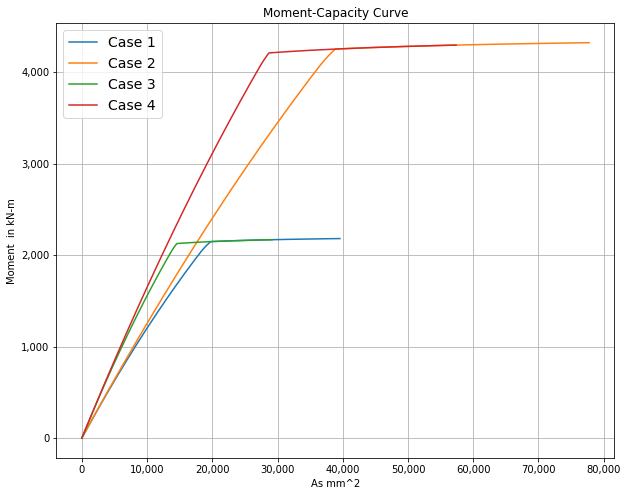

In [3]:
# Plot the curves
plt.figure(figsize=(10,8))
plt.title("Moment-Capacity Curve")
plt.xlabel('As mm^2')
plt.ylabel('Moment  in kN-m')
plt.grid()

# Plot the converted values
case1, = plt.plot(As[0], M[0], label='Case 1')
case2, = plt.plot(As[1], M[1], label='Case 2')
case3, = plt.plot(As[2], M[2], label='Case 3')
case4, = plt.plot(As[3], M[3], label='Case 4')

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_formatter = tkr.FuncFormatter(func)

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(y_formatter)
ax.xaxis.set_major_formatter(y_formatter)

plt.legend(handles=[case1, case2, case3, case4], loc='best', fontsize=14)
plt.show()